# Table Content

- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Assumptions](#Assumptions)
- [Data Import,Cleaning and EDA](#Data-Import,-Cleaning-and-EDA)
- [Preprocessing & Modeling](#Preprocessing-&-Modeling)
- [Conclusions & Recommendations](#Conclusions-&-Recommendations)

# Background

Real Sky Estate Development has been developing residential areas around Ames and is looking to procure and develop new housing in the area. 

Previous housing developments were not returning favorable profits due to the recent pandemic and political tensions. It also caused a rise in the costs of living and building materials over the years.

Facing a forecasted recession in the upcoming year, Real Sky senior management team has reached out to our data science team to pinpoint factors that will direct towards revamping the company’s focus structure to improve the attractiveness and sales price of new housing developments. 

# Problem Statement

What is the core features to focus on to increase a house’s sale price for our next development project?

# Assumptions

The following are the assumptions made:
- Only features with metrics correlation >0.6 with reference with sale price are considered for the analysis
- Time constraint for the project
- Only select features with less than 5% missing data
- Missing data are replaced with median values of the features ([*source*](https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/)) 

# Data Import, Cleaning and EDA

## Import libraries

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import scipy as sp

import seaborn as sns

import shap

import sklearn 

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

## Functions

### Lowercase

In [2]:
#Purpose : To change all strings to lowercase
def lcase(dataframe=""):
    
    #Make column names lower case.
    dataframe.columns=dataframe.columns.str.lower()

    #Create a list to store updated column names
    column_name=dataframe.columns

    #Create a loop to check each column data and unique values
    for name in column_name:
        display(name)
        try:
            dataframe[name] = dataframe[name].str.lower()
            display(dataframe[name].value_counts(dropna=False))
        except:
            display(f"{name} values are numbers.")
    pass

### Ordinal Values

In [3]:
#Purpose : To change ordinal values to numbers.
def ord_val(dataframe=""):
    
    #create a ordinal list to store the values 
    ordinal_list=[
        {"lot shape":{"reg":3,"ir1":2,"ir2":1,"ir3":0}},
       {"utilities":{"allpub":3,"nosewr":2,"nosewr":1,"elo":0}},
        {"land slope":{"gtl":2,"mod":1,"sev":0}},
        {"exter qual":{"ex":4,"gd":3,"ta":2,"fa":1,"po":0}},
        {"exter cond":{"ex":4,"gd":3,"ta":2,"fa":1,"po":0}},
        {"bsmt qual":{"ex":5,"gd":4,"ta":3,"fa":2,"po":1,"na":0}},
        {"bsmt cond":{"ex":5,"gd":4,"ta":3,"fa":2,"po":1,"na":0}},
        {"bsmt exposure":{"gd":4,"av":3, "mn":2,"no":1,"na":0}},
        {"bsmtfin type 1":{"glq":6,"alq":5,"blq":4,"rec":3,"lwq":2,"unf":1,"na":0}},
        {"bsmtfintype 2":{"glq":6,"alq":5,"blq":4,"rec":3,"lwq":2,"unf":1,"na":0}},
        {"heatingqc":{"ex":4,"gd":3,"ta":2,"fa":1,"po":0}},
        {"electrical":{"sbrkr":4,"fusea":3,"fusef":2,"fusep":1,"mix":0}},
        {"kitchenqual":{"ex":4,"gd":3,"ta":2,"fa":1,"po":0}},
       {"functional":{"typ":7,"min1":6,"min2":5,"mod":4,"maj1":3,"maj2":2,"sev":1,"sal":0}},
       {"fireplacequ":{"ex":5,"gd":4,"ta":3,"fa":2,"po":1,"na":0}},
        {"garage finish":{"fin":3,"rfn":2,"unf":1,"na":0}},
        {"garage qual":{"ex":5,"gd":4,"ta":3,"fa":2,"po":1,"na":0}},
        {"garage cond":{"ex":5,"gd":4,"ta":3,"fa":2,"po":1,"na":0}},
        {"paved drive":{"y":2,"p":1,"n":0}},
        {"pool qc":{"ex":4,"gd":3,"ta":2,"fa":1,"po":0}},
        {"fence":{"gdprv":4,"mnprv":3,"gdwo":2,"mnww":1,"na":0}}]
    
    #Create a check list
    list_to_check = ["lot shape","utilities","land slope","exter qual","exter cond","bsmt qual",
                 "bsmt cond","bsmt exposure","bsmtfin type 1","bsmtfintype 2","heatingqc","electrical",
                 "kitchenqual","functional","fireplacequ","garage finish","garage qual","garage cond",
                 "paved drive","pool qc","fence"]
    
    #Loop the ordinal list and replace the ordinal values in the dataset
    for index, col in enumerate(list_to_check):
        try:
            dataframe[col] = dataframe[col].map(ordinal_list[index][col])
            display(dataframe[col].value_counts())
        except:
            display(col)
            display(f"{col} has been removed and therefore, the ordinal is not converted.")
    pass

### Drop columns(>5% missing values)

In [4]:
#Purpose : Drop columns that have more than 5% missing values
def dcol(dataframe=""):
    
    #Create a list to store column names.
    column_name=dataframe.columns

    #Create a list to store dropped names.
    dropped_names=[]
    
    #Create a variable to store the number of dropped count.
    dropped_count=0
    
    #Limit for missing values is 95% as imputation of data can only be done for missing data <5%.
    threshold=0.95
    
    #Run a loop to loop through all the column names that met the condition and drop accordingly.
    for name in column_name:
        if dataframe[name].value_counts().sum()<(len(dataframe)*threshold):
            dataframe.drop(name, axis="columns",inplace=True)

            #Store dropped names and count.
            dropped_names.append(name)
            dropped_count+=1
            
     #Print a message to let know what column is dropped and sum of the number of dropped column.     
    print(f"The total number of dropped column is {dropped_count}. The column names that is dropped are {dropped_names}.")
    
    #Print a message to show the current rows and columns of the dataset.
    print(dataframe.shape)
    pass

### Replace non values with median

In [5]:
#Purpose : Replace nan values with median values in the data columns

def replace_nan_with_med(dataframe=""):
    
    #Create a list to store updated column names
    column_name=dataframe.columns

    #Create a loop to check null values, and remove them accordingly.
    for name in column_name:
        display(name)
        try:
            if (dataframe[name].isnull().sum())!=0:
                display(f"{name} has {dataframe[name].isnull().sum()} nan values before cleaning.")
                dataframe[name][np.isnan(dataframe[name])] = np.median(dataframe[name][~np.isnan(dataframe[name])])
                display(f"All of {name}'s nan values has been replaced with median values after cleaning.")
            else:
                display(f"This {name} is not applicable for replacing nan values.")
        except:
            display(f"This {name} is an object type and therefore not applicable for replacing nan with median values.")
            
    pass

### Check inconsistant data & unique values

In [6]:
#Purpose : Check for inconsistant data and unique values

def inconsist_uni_val(dataframe):
    
    #Create a list to store updated column names
    column_name=dataframe.columns[2:]

    #Create a loop to check each column data and unique values
    for name in column_name:
        display(name)
        display(dataframe[name].value_counts(dropna=False))
    pass

### Removal of white spaces

In [7]:
#Purpose : Remove white spaces in rows

def remove_white_sp(dataframe=""):
    
    #Create a list to store updated column names
    column_name=dataframe.columns

    #Create a loop to remove white spaces in rows
    for name in column_name:
        display(name)
        try:
            dataframe[name]=dataframe[name].str.strip()
            display(dataframe[name].value_counts(dropna=False))
        except:
            display(f"{name} has no white space.")
    pass

## Data Import & Cleaning

### Import of Datasets

In [8]:
#train.csv - this data contains all of the training data for your model.
df_train=pd.read_csv("./1-datas/train.csv")

#test.csv - this data contains the test data for your model. 
#Use this data into your regression model to make predictions.
df_test=pd.read_csv("./1-datas/test.csv")

#An example of a correctly formatted submission for Kaggle.
df_sample=pd.read_csv("./1-datas/sample_sub_reg.csv")

### Train Dataset

In [9]:
#See the number of rows and columns of the dataset
df_train.shape

(2051, 81)

In [10]:
#See the first and last 5 train dataset
display(df_train.head())
display(df_train.tail())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [11]:
#Check columns names
display(df_train.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
#Check for duplicates
display(df_train.duplicated().sum())

0

In [13]:
#Check dataset info
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

None

In [14]:
#Change dataset strings to lowercase
lcase(df_train)

'id'

'id values are numbers.'

'pid'

'pid values are numbers.'

'ms subclass'

'ms subclass values are numbers.'

'ms zoning'

rl         1598
rm          316
fv          101
c (all)      19
rh           14
a (agr)       2
i (all)       1
Name: ms zoning, dtype: int64

'lot frontage'

'lot frontage values are numbers.'

'lot area'

'lot area values are numbers.'

'street'

pave    2044
grvl       7
Name: street, dtype: int64

'alley'

NaN     1911
grvl      85
pave      55
Name: alley, dtype: int64

'lot shape'

reg    1295
ir1     692
ir2      55
ir3       9
Name: lot shape, dtype: int64

'land contour'

lvl    1843
hls      85
bnk      80
low      43
Name: land contour, dtype: int64

'utilities'

allpub    2049
nosewa       1
nosewr       1
Name: utilities, dtype: int64

'lot config'

inside     1503
corner      348
culdsac     131
fr2          60
fr3           9
Name: lot config, dtype: int64

'land slope'

gtl    1953
mod      88
sev      10
Name: land slope, dtype: int64

'neighborhood'

names      310
collgcr    180
oldtown    163
edwards    143
somerst    130
nridght    122
gilbert    116
sawyer     111
nwames      87
sawyerw     87
mitchel     82
brkside     76
crawfor     71
idotrr      69
noridge     48
timber      48
stonebr     38
swisu       32
clearcr     27
meadowv     24
blmngtn     22
brdale      19
veenker     17
npkvill     17
blueste      6
greens       3
grnhill      2
landmrk      1
Name: neighborhood, dtype: int64

'condition 1'

norm      1767
feedr      109
artery      70
rran        36
posn        27
rrae        21
posa        12
rrnn         6
rrne         3
Name: condition 1, dtype: int64

'condition 2'

norm      2025
feedr       11
artery       5
posa         3
posn         3
rrnn         2
rrae         1
rran         1
Name: condition 2, dtype: int64

'bldg type'

1fam      1700
twnhse     161
duplex      75
twnhs       69
2fmcon      46
Name: bldg type, dtype: int64

'house style'

1story    1059
2story     598
1.5fin     218
slvl        94
sfoyer      50
2.5unf      14
1.5unf      12
2.5fin       6
Name: house style, dtype: int64

'overall qual'

'overall qual values are numbers.'

'overall cond'

'overall cond values are numbers.'

'year built'

'year built values are numbers.'

'year remod/add'

'year remod/add values are numbers.'

'roof style'

gable      1619
hip         397
flat         13
gambrel      12
mansard       7
shed          3
Name: roof style, dtype: int64

'roof matl'

compshg    2025
tar&grv      15
wdshngl       5
wdshake       4
membran       1
clytile       1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    724
metalsd    331
hdboard    300
wd sdng    276
plywood    152
cemntbd     90
brkface     64
wdshing     45
asbshng     33
stucco      27
brkcomm      3
stone        2
cblock       2
imstucc      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    721
metalsd    324
hdboard    275
wd sdng    262
plywood    185
cmentbd     90
wd shng     63
brkface     34
stucco      30
asbshng     28
brk cmn     17
imstucc     11
stone        6
asphshn      3
cblock       2
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       1218
brkface     630
stone       168
NaN          22
brkcmn       13
Name: mas vnr type, dtype: int64

'mas vnr area'

'mas vnr area values are numbers.'

'exter qual'

ta    1247
gd     697
ex      81
fa      26
Name: exter qual, dtype: int64

'exter cond'

ta    1778
gd     215
fa      49
ex       7
po       2
Name: exter cond, dtype: int64

'foundation'

pconc     926
cblock    863
brktil    221
slab       34
stone       5
wood        2
Name: foundation, dtype: int64

'bsmt qual'

ta     887
gd     864
ex     184
fa      60
NaN     55
po       1
Name: bsmt qual, dtype: int64

'bsmt cond'

ta     1834
gd       89
fa       65
NaN      55
po        5
ex        3
Name: bsmt cond, dtype: int64

'bsmt exposure'

no     1339
av      288
gd      203
mn      163
NaN      58
Name: bsmt exposure, dtype: int64

'bsmtfin type 1'

glq    615
unf    603
alq    293
blq    200
rec    183
lwq    102
NaN     55
Name: bsmtfin type 1, dtype: int64

'bsmtfin sf 1'

'bsmtfin sf 1 values are numbers.'

'bsmtfin type 2'

unf    1749
rec      80
lwq      60
NaN      56
blq      48
alq      35
glq      23
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

'bsmtfin sf 2 values are numbers.'

'bsmt unf sf'

'bsmt unf sf values are numbers.'

'total bsmt sf'

'total bsmt sf values are numbers.'

'heating'

gasa    2018
gasw      20
wall       6
grav       5
othw       2
Name: heating, dtype: int64

'heating qc'

ex    1065
ta     597
gd     319
fa      67
po       3
Name: heating qc, dtype: int64

'central air'

y    1910
n     141
Name: central air, dtype: int64

'electrical'

sbrkr    1868
fusea     140
fusef      35
fusep       7
mix         1
Name: electrical, dtype: int64

'1st flr sf'

'1st flr sf values are numbers.'

'2nd flr sf'

'2nd flr sf values are numbers.'

'low qual fin sf'

'low qual fin sf values are numbers.'

'gr liv area'

'gr liv area values are numbers.'

'bsmt full bath'

'bsmt full bath values are numbers.'

'bsmt half bath'

'bsmt half bath values are numbers.'

'full bath'

'full bath values are numbers.'

'half bath'

'half bath values are numbers.'

'bedroom abvgr'

'bedroom abvgr values are numbers.'

'kitchen abvgr'

'kitchen abvgr values are numbers.'

'kitchen qual'

ta    1047
gd     806
ex     151
fa      47
Name: kitchen qual, dtype: int64

'totrms abvgrd'

'totrms abvgrd values are numbers.'

'functional'

typ     1915
min2      42
min1      42
mod       29
maj1      12
maj2       7
sev        2
sal        2
Name: functional, dtype: int64

'fireplaces'

'fireplaces values are numbers.'

'fireplace qu'

NaN    1000
gd      523
ta      407
fa       59
po       31
ex       31
Name: fireplace qu, dtype: int64

'garage type'

attchd     1213
detchd      536
builtin     132
NaN         113
basment      27
2types       19
carport      11
Name: garage type, dtype: int64

'garage yr blt'

'garage yr blt values are numbers.'

'garage finish'

unf    849
rfn    579
fin    509
NaN    114
Name: garage finish, dtype: int64

'garage cars'

'garage cars values are numbers.'

'garage area'

'garage area values are numbers.'

'garage qual'

ta     1832
NaN     114
fa       82
gd       18
ex        3
po        2
Name: garage qual, dtype: int64

'garage cond'

ta     1868
NaN     114
fa       47
gd       12
po        8
ex        2
Name: garage cond, dtype: int64

'paved drive'

y    1861
n     151
p      39
Name: paved drive, dtype: int64

'wood deck sf'

'wood deck sf values are numbers.'

'open porch sf'

'open porch sf values are numbers.'

'enclosed porch'

'enclosed porch values are numbers.'

'3ssn porch'

'3ssn porch values are numbers.'

'screen porch'

'screen porch values are numbers.'

'pool area'

'pool area values are numbers.'

'pool qc'

NaN    2042
gd        4
fa        2
ta        2
ex        1
Name: pool qc, dtype: int64

'fence'

NaN      1651
mnprv     227
gdprv      83
gdwo       80
mnww       10
Name: fence, dtype: int64

'misc feature'

NaN     1986
shed      56
gar2       4
othr       3
tenc       1
elev       1
Name: misc feature, dtype: int64

'misc val'

'misc val values are numbers.'

'mo sold'

'mo sold values are numbers.'

'yr sold'

'yr sold values are numbers.'

'sale type'

wd       1781
new       160
cod        63
conld      17
cwd        10
conli       7
conlw       5
con         4
oth         4
Name: sale type, dtype: int64

'saleprice'

'saleprice values are numbers.'

In [15]:
#Change ordinal values in dataset
ord_val(df_train)

3    1295
2     692
1      55
0       9
Name: lot shape, dtype: int64

3.0    2049
1.0       1
Name: utilities, dtype: int64

2    1953
1      88
0      10
Name: land slope, dtype: int64

2    1247
3     697
4      81
1      26
Name: exter qual, dtype: int64

2    1778
3     215
1      49
4       7
0       2
Name: exter cond, dtype: int64

3.0    887
4.0    864
5.0    184
2.0     60
1.0      1
Name: bsmt qual, dtype: int64

3.0    1834
4.0      89
2.0      65
1.0       5
5.0       3
Name: bsmt cond, dtype: int64

1.0    1339
3.0     288
4.0     203
2.0     163
Name: bsmt exposure, dtype: int64

6.0    615
1.0    603
5.0    293
4.0    200
3.0    183
2.0    102
Name: bsmtfin type 1, dtype: int64

'bsmtfintype 2'

'bsmtfintype 2 has been removed and therefore, the ordinal is not converted.'

'heatingqc'

'heatingqc has been removed and therefore, the ordinal is not converted.'

4    1868
3     140
2      35
1       7
0       1
Name: electrical, dtype: int64

'kitchenqual'

'kitchenqual has been removed and therefore, the ordinal is not converted.'

7    1915
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

'fireplacequ'

'fireplacequ has been removed and therefore, the ordinal is not converted.'

1.0    849
2.0    579
3.0    509
Name: garage finish, dtype: int64

3.0    1832
2.0      82
4.0      18
5.0       3
1.0       2
Name: garage qual, dtype: int64

3.0    1868
2.0      47
4.0      12
1.0       8
5.0       2
Name: garage cond, dtype: int64

2    1861
0     151
1      39
Name: paved drive, dtype: int64

3.0    4
1.0    2
2.0    2
4.0    1
Name: pool qc, dtype: int64

3.0    227
4.0     83
2.0     80
1.0     10
Name: fence, dtype: int64

In [16]:
#Drop column that has more than 5% missing value
dcol(df_train)

The total number of dropped column is 11. The column names that is dropped are ['lot frontage', 'alley', 'fireplace qu', 'garage type', 'garage yr blt', 'garage finish', 'garage qual', 'garage cond', 'pool qc', 'fence', 'misc feature'].
(2051, 70)


In [17]:
#Check column names again to see if it is really drop.
df_train.columns

Index(['id', 'pid', 'ms subclass', 'ms zoning', 'lot area', 'street',
       'lot shape', 'land contour', 'utilities', 'lot config', 'land slope',
       'neighborhood', 'condition 1', 'condition 2', 'bldg type',
       'house style', 'overall qual', 'overall cond', 'year built',
       'year remod/add', 'roof style', 'roof matl', 'exterior 1st',
       'exterior 2nd', 'mas vnr type', 'mas vnr area', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin sf 1', 'bsmtfin type 2', 'bsmtfin sf 2',
       'bsmt unf sf', 'total bsmt sf', 'heating', 'heating qc', 'central air',
       'electrical', '1st flr sf', '2nd flr sf', 'low qual fin sf',
       'gr liv area', 'bsmt full bath', 'bsmt half bath', 'full bath',
       'half bath', 'bedroom abvgr', 'kitchen abvgr', 'kitchen qual',
       'totrms abvgrd', 'functional', 'fireplaces', 'garage cars',
       'garage area', 'paved drive', 'wood deck sf', 'open porch sf',
    

In [18]:
#Find remaining columns that contains missing values
df_train.isnull().sum().sort_values(ascending = False).head(25)

bsmt exposure      58
bsmtfin type 2     56
bsmt cond          55
bsmtfin type 1     55
bsmt qual          55
mas vnr type       22
mas vnr area       22
bsmt half bath      2
bsmt full bath      2
garage cars         1
garage area         1
bsmtfin sf 2        1
utilities           1
bsmtfin sf 1        1
bsmt unf sf         1
total bsmt sf       1
half bath           0
gr liv area         0
low qual fin sf     0
2nd flr sf          0
full bath           0
kitchen abvgr       0
bedroom abvgr       0
electrical          0
sale type           0
dtype: int64

In [19]:
#Replace nan values with medians.
replace_nan_with_med(df_train)

'id'

'This id is not applicable for replacing nan values.'

'pid'

'This pid is not applicable for replacing nan values.'

'ms subclass'

'This ms subclass is not applicable for replacing nan values.'

'ms zoning'

'This ms zoning is not applicable for replacing nan values.'

'lot area'

'This lot area is not applicable for replacing nan values.'

'street'

'This street is not applicable for replacing nan values.'

'lot shape'

'This lot shape is not applicable for replacing nan values.'

'land contour'

'This land contour is not applicable for replacing nan values.'

'utilities'

'utilities has 1 nan values before cleaning.'

"All of utilities's nan values has been replaced with median values after cleaning."

'lot config'

'This lot config is not applicable for replacing nan values.'

'land slope'

'This land slope is not applicable for replacing nan values.'

'neighborhood'

'This neighborhood is not applicable for replacing nan values.'

'condition 1'

'This condition 1 is not applicable for replacing nan values.'

'condition 2'

'This condition 2 is not applicable for replacing nan values.'

'bldg type'

'This bldg type is not applicable for replacing nan values.'

'house style'

'This house style is not applicable for replacing nan values.'

'overall qual'

'This overall qual is not applicable for replacing nan values.'

'overall cond'

'This overall cond is not applicable for replacing nan values.'

'year built'

'This year built is not applicable for replacing nan values.'

'year remod/add'

'This year remod/add is not applicable for replacing nan values.'

'roof style'

'This roof style is not applicable for replacing nan values.'

'roof matl'

'This roof matl is not applicable for replacing nan values.'

'exterior 1st'

'This exterior 1st is not applicable for replacing nan values.'

'exterior 2nd'

'This exterior 2nd is not applicable for replacing nan values.'

'mas vnr type'

'mas vnr type has 22 nan values before cleaning.'

'This mas vnr type is an object type and therefore not applicable for replacing nan with median values.'

'mas vnr area'

'mas vnr area has 22 nan values before cleaning.'

"All of mas vnr area's nan values has been replaced with median values after cleaning."

'exter qual'

'This exter qual is not applicable for replacing nan values.'

'exter cond'

'This exter cond is not applicable for replacing nan values.'

'foundation'

'This foundation is not applicable for replacing nan values.'

'bsmt qual'

'bsmt qual has 55 nan values before cleaning.'

"All of bsmt qual's nan values has been replaced with median values after cleaning."

'bsmt cond'

'bsmt cond has 55 nan values before cleaning.'

"All of bsmt cond's nan values has been replaced with median values after cleaning."

'bsmt exposure'

'bsmt exposure has 58 nan values before cleaning.'

"All of bsmt exposure's nan values has been replaced with median values after cleaning."

'bsmtfin type 1'

'bsmtfin type 1 has 55 nan values before cleaning.'

"All of bsmtfin type 1's nan values has been replaced with median values after cleaning."

'bsmtfin sf 1'

'bsmtfin sf 1 has 1 nan values before cleaning.'

"All of bsmtfin sf 1's nan values has been replaced with median values after cleaning."

'bsmtfin type 2'

'bsmtfin type 2 has 56 nan values before cleaning.'

'This bsmtfin type 2 is an object type and therefore not applicable for replacing nan with median values.'

'bsmtfin sf 2'

'bsmtfin sf 2 has 1 nan values before cleaning.'

"All of bsmtfin sf 2's nan values has been replaced with median values after cleaning."

'bsmt unf sf'

'bsmt unf sf has 1 nan values before cleaning.'

"All of bsmt unf sf's nan values has been replaced with median values after cleaning."

'total bsmt sf'

'total bsmt sf has 1 nan values before cleaning.'

"All of total bsmt sf's nan values has been replaced with median values after cleaning."

'heating'

'This heating is not applicable for replacing nan values.'

'heating qc'

'This heating qc is not applicable for replacing nan values.'

'central air'

'This central air is not applicable for replacing nan values.'

'electrical'

'This electrical is not applicable for replacing nan values.'

'1st flr sf'

'This 1st flr sf is not applicable for replacing nan values.'

'2nd flr sf'

'This 2nd flr sf is not applicable for replacing nan values.'

'low qual fin sf'

'This low qual fin sf is not applicable for replacing nan values.'

'gr liv area'

'This gr liv area is not applicable for replacing nan values.'

'bsmt full bath'

'bsmt full bath has 2 nan values before cleaning.'

"All of bsmt full bath's nan values has been replaced with median values after cleaning."

'bsmt half bath'

'bsmt half bath has 2 nan values before cleaning.'

"All of bsmt half bath's nan values has been replaced with median values after cleaning."

'full bath'

'This full bath is not applicable for replacing nan values.'

'half bath'

'This half bath is not applicable for replacing nan values.'

'bedroom abvgr'

'This bedroom abvgr is not applicable for replacing nan values.'

'kitchen abvgr'

'This kitchen abvgr is not applicable for replacing nan values.'

'kitchen qual'

'This kitchen qual is not applicable for replacing nan values.'

'totrms abvgrd'

'This totrms abvgrd is not applicable for replacing nan values.'

'functional'

'This functional is not applicable for replacing nan values.'

'fireplaces'

'This fireplaces is not applicable for replacing nan values.'

'garage cars'

'garage cars has 1 nan values before cleaning.'

"All of garage cars's nan values has been replaced with median values after cleaning."

'garage area'

'garage area has 1 nan values before cleaning.'

"All of garage area's nan values has been replaced with median values after cleaning."

'paved drive'

'This paved drive is not applicable for replacing nan values.'

'wood deck sf'

'This wood deck sf is not applicable for replacing nan values.'

'open porch sf'

'This open porch sf is not applicable for replacing nan values.'

'enclosed porch'

'This enclosed porch is not applicable for replacing nan values.'

'3ssn porch'

'This 3ssn porch is not applicable for replacing nan values.'

'screen porch'

'This screen porch is not applicable for replacing nan values.'

'pool area'

'This pool area is not applicable for replacing nan values.'

'misc val'

'This misc val is not applicable for replacing nan values.'

'mo sold'

'This mo sold is not applicable for replacing nan values.'

'yr sold'

'This yr sold is not applicable for replacing nan values.'

'sale type'

'This sale type is not applicable for replacing nan values.'

'saleprice'

'This saleprice is not applicable for replacing nan values.'

In [20]:
#Check for inconsistance and unique values in dataframe
inconsist_uni_val(df_train)

'ms subclass'

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: ms subclass, dtype: int64

'ms zoning'

rl         1598
rm          316
fv          101
c (all)      19
rh           14
a (agr)       2
i (all)       1
Name: ms zoning, dtype: int64

'lot area'

9600     34
7200     27
6000     26
10800    19
9000     18
         ..
8765      1
10337     1
7614      1
7315      1
7558      1
Name: lot area, Length: 1476, dtype: int64

'street'

pave    2044
grvl       7
Name: street, dtype: int64

'lot shape'

3    1295
2     692
1      55
0       9
Name: lot shape, dtype: int64

'land contour'

lvl    1843
hls      85
bnk      80
low      43
Name: land contour, dtype: int64

'utilities'

3.0    2050
1.0       1
Name: utilities, dtype: int64

'lot config'

inside     1503
corner      348
culdsac     131
fr2          60
fr3           9
Name: lot config, dtype: int64

'land slope'

2    1953
1      88
0      10
Name: land slope, dtype: int64

'neighborhood'

names      310
collgcr    180
oldtown    163
edwards    143
somerst    130
nridght    122
gilbert    116
sawyer     111
nwames      87
sawyerw     87
mitchel     82
brkside     76
crawfor     71
idotrr      69
noridge     48
timber      48
stonebr     38
swisu       32
clearcr     27
meadowv     24
blmngtn     22
brdale      19
veenker     17
npkvill     17
blueste      6
greens       3
grnhill      2
landmrk      1
Name: neighborhood, dtype: int64

'condition 1'

norm      1767
feedr      109
artery      70
rran        36
posn        27
rrae        21
posa        12
rrnn         6
rrne         3
Name: condition 1, dtype: int64

'condition 2'

norm      2025
feedr       11
artery       5
posa         3
posn         3
rrnn         2
rrae         1
rran         1
Name: condition 2, dtype: int64

'bldg type'

1fam      1700
twnhse     161
duplex      75
twnhs       69
2fmcon      46
Name: bldg type, dtype: int64

'house style'

1story    1059
2story     598
1.5fin     218
slvl        94
sfoyer      50
2.5unf      14
1.5unf      12
2.5fin       6
Name: house style, dtype: int64

'overall qual'

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall qual, dtype: int64

'overall cond'

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall cond, dtype: int64

'year built'

2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
2010      1
1892      1
1896      1
1913      1
1885      1
Name: year built, Length: 113, dtype: int64

'year remod/add'

1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1986      9
2010      8
1983      7
1981      6
1982      3
Name: year remod/add, Length: 61, dtype: int64

'roof style'

gable      1619
hip         397
flat         13
gambrel      12
mansard       7
shed          3
Name: roof style, dtype: int64

'roof matl'

compshg    2025
tar&grv      15
wdshngl       5
wdshake       4
membran       1
clytile       1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    724
metalsd    331
hdboard    300
wd sdng    276
plywood    152
cemntbd     90
brkface     64
wdshing     45
asbshng     33
stucco      27
brkcomm      3
stone        2
cblock       2
imstucc      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    721
metalsd    324
hdboard    275
wd sdng    262
plywood    185
cmentbd     90
wd shng     63
brkface     34
stucco      30
asbshng     28
brk cmn     17
imstucc     11
stone        6
asphshn      3
cblock       2
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       1218
brkface     630
stone       168
NaN          22
brkcmn       13
Name: mas vnr type, dtype: int64

'mas vnr area'

0.0      1238
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: mas vnr area, Length: 373, dtype: int64

'exter qual'

2    1247
3     697
4      81
1      26
Name: exter qual, dtype: int64

'exter cond'

2    1778
3     215
1      49
4       7
0       2
Name: exter cond, dtype: int64

'foundation'

pconc     926
cblock    863
brktil    221
slab       34
stone       5
wood        2
Name: foundation, dtype: int64

'bsmt qual'

4.0    919
3.0    887
5.0    184
2.0     60
1.0      1
Name: bsmt qual, dtype: int64

'bsmt cond'

3.0    1889
4.0      89
2.0      65
1.0       5
5.0       3
Name: bsmt cond, dtype: int64

'bsmt exposure'

1.0    1397
3.0     288
4.0     203
2.0     163
Name: bsmt exposure, dtype: int64

'bsmtfin type 1'

6.0    615
1.0    603
5.0    293
4.0    255
3.0    183
2.0    102
Name: bsmtfin type 1, dtype: int64

'bsmtfin sf 1'

0.0       657
24.0       17
16.0       10
384.0       7
20.0        7
         ... 
380.0       1
223.0       1
631.0       1
1053.0      1
155.0       1
Name: bsmtfin sf 1, Length: 821, dtype: int64

'bsmtfin type 2'

unf    1749
rec      80
lwq      60
NaN      56
blq      48
alq      35
glq      23
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

0.0       1804
294.0        5
483.0        3
72.0         3
180.0        3
          ... 
132.0        1
829.0        1
1127.0       1
435.0        1
750.0        1
Name: bsmtfin sf 2, Length: 205, dtype: int64

'bsmt unf sf'

0.0       165
384.0      14
672.0      11
728.0      10
216.0       9
         ... 
739.0       1
577.0       1
117.0       1
1491.0      1
994.0       1
Name: bsmt unf sf, Length: 968, dtype: int64

'total bsmt sf'

0.0       54
864.0     51
672.0     20
1040.0    20
912.0     17
          ..
1508.0     1
1840.0     1
423.0      1
2461.0     1
1932.0     1
Name: total bsmt sf, Length: 893, dtype: int64

'heating'

gasa    2018
gasw      20
wall       6
grav       5
othw       2
Name: heating, dtype: int64

'heating qc'

ex    1065
ta     597
gd     319
fa      67
po       3
Name: heating qc, dtype: int64

'central air'

y    1910
n     141
Name: central air, dtype: int64

'electrical'

4    1868
3     140
2      35
1       7
0       1
Name: electrical, dtype: int64

'1st flr sf'

864     31
1040    22
816     13
912     13
960     12
        ..
2726     1
938      1
2196     1
1357     1
1932     1
Name: 1st flr sf, Length: 915, dtype: int64

'2nd flr sf'

0       1191
728       15
504       14
546       12
600       10
        ... 
1323       1
1288       1
765        1
571        1
776        1
Name: 2nd flr sf, Length: 504, dtype: int64

'low qual fin sf'

0       2018
80         3
205        2
512        1
362        1
53         1
360        1
384        1
156        1
436        1
259        1
479        1
140        1
397        1
514        1
144        1
697        1
114        1
390        1
234        1
572        1
312        1
120        1
515        1
1064       1
108        1
473        1
371        1
513        1
528        1
450        1
Name: low qual fin sf, dtype: int64

'gr liv area'

864     25
1040    20
1092    19
1200    16
1456    15
        ..
1014     1
715      1
1598     1
572      1
1804     1
Name: gr liv area, Length: 1053, dtype: int64

'bsmt full bath'

0.0    1202
1.0     824
2.0      23
3.0       2
Name: bsmt full bath, dtype: int64

'bsmt half bath'

0.0    1925
1.0     122
2.0       4
Name: bsmt half bath, dtype: int64

'full bath'

2    1096
1     900
3      45
0       8
4       2
Name: full bath, dtype: int64

'half bath'

0    1308
1     725
2      18
Name: half bath, dtype: int64

'bedroom abvgr'

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom abvgr, dtype: int64

'kitchen abvgr'

1    1960
2      88
0       2
3       1
Name: kitchen abvgr, dtype: int64

'kitchen qual'

ta    1047
gd     806
ex     151
fa      47
Name: kitchen qual, dtype: int64

'totrms abvgrd'

6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
14      1
2       1
13      1
15      1
Name: totrms abvgrd, dtype: int64

'functional'

7    1915
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

'fireplaces'

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

'garage cars'

2.0    1137
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: garage cars, dtype: int64

'garage area'

0.0      113
440.0     70
576.0     69
484.0     52
528.0     46
        ... 
535.0      1
399.0      1
859.0      1
100.0      1
217.0      1
Name: garage area, Length: 514, dtype: int64

'paved drive'

2    1861
0     151
1      39
Name: paved drive, dtype: int64

'wood deck sf'

0      1075
100      53
144      46
192      43
120      40
       ... 
70        1
380       1
260       1
311       1
241       1
Name: wood deck sf, Length: 322, dtype: int64

'open porch sf'

0      912
48      40
36      38
40      34
32      29
      ... 
106      1
97       1
278      1
319      1
276      1
Name: open porch sf, Length: 223, dtype: int64

'enclosed porch'

0      1724
112      13
96       10
40        6
216       6
       ... 
50        1
26        1
109       1
239       1
67        1
Name: enclosed porch, Length: 159, dtype: int64

'3ssn porch'

0      2025
168       3
153       3
144       2
140       1
290       1
182       1
245       1
216       1
86        1
323       1
96        1
180       1
176       1
508       1
255       1
150       1
407       1
120       1
162       1
224       1
304       1
Name: 3ssn porch, dtype: int64

'screen porch'

0      1870
144       9
168       8
192       7
180       7
       ... 
53        1
135       1
141       1
348       1
190       1
Name: screen porch, Length: 100, dtype: int64

'pool area'

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: pool area, dtype: int64

'misc val'

0        1986
400        12
500         8
600         6
450         5
2000        5
700         4
1200        2
3000        2
2500        2
4500        2
17000       1
1300        1
900         1
1500        1
800         1
6500        1
54          1
3500        1
1150        1
300         1
455         1
8300        1
460         1
12500       1
480         1
650         1
80          1
Name: misc val, dtype: int64

'mo sold'

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mo sold, dtype: int64

'yr sold'

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr sold, dtype: int64

'sale type'

wd       1781
new       160
cod        63
conld      17
cwd        10
conli       7
conlw       5
con         4
oth         4
Name: sale type, dtype: int64

'saleprice'

130000    25
140000    22
145000    20
135000    19
160000    16
          ..
160250     1
267916     1
264132     1
198500     1
298751     1
Name: saleprice, Length: 828, dtype: int64

In [21]:
#Removal of white spaces in the dataframe
remove_white_sp(df_train)

'id'

'id has no white space.'

'pid'

'pid has no white space.'

'ms subclass'

'ms subclass has no white space.'

'ms zoning'

rl         1598
rm          316
fv          101
c (all)      19
rh           14
a (agr)       2
i (all)       1
Name: ms zoning, dtype: int64

'lot area'

'lot area has no white space.'

'street'

pave    2044
grvl       7
Name: street, dtype: int64

'lot shape'

'lot shape has no white space.'

'land contour'

lvl    1843
hls      85
bnk      80
low      43
Name: land contour, dtype: int64

'utilities'

'utilities has no white space.'

'lot config'

inside     1503
corner      348
culdsac     131
fr2          60
fr3           9
Name: lot config, dtype: int64

'land slope'

'land slope has no white space.'

'neighborhood'

names      310
collgcr    180
oldtown    163
edwards    143
somerst    130
nridght    122
gilbert    116
sawyer     111
nwames      87
sawyerw     87
mitchel     82
brkside     76
crawfor     71
idotrr      69
noridge     48
timber      48
stonebr     38
swisu       32
clearcr     27
meadowv     24
blmngtn     22
brdale      19
veenker     17
npkvill     17
blueste      6
greens       3
grnhill      2
landmrk      1
Name: neighborhood, dtype: int64

'condition 1'

norm      1767
feedr      109
artery      70
rran        36
posn        27
rrae        21
posa        12
rrnn         6
rrne         3
Name: condition 1, dtype: int64

'condition 2'

norm      2025
feedr       11
artery       5
posa         3
posn         3
rrnn         2
rrae         1
rran         1
Name: condition 2, dtype: int64

'bldg type'

1fam      1700
twnhse     161
duplex      75
twnhs       69
2fmcon      46
Name: bldg type, dtype: int64

'house style'

1story    1059
2story     598
1.5fin     218
slvl        94
sfoyer      50
2.5unf      14
1.5unf      12
2.5fin       6
Name: house style, dtype: int64

'overall qual'

'overall qual has no white space.'

'overall cond'

'overall cond has no white space.'

'year built'

'year built has no white space.'

'year remod/add'

'year remod/add has no white space.'

'roof style'

gable      1619
hip         397
flat         13
gambrel      12
mansard       7
shed          3
Name: roof style, dtype: int64

'roof matl'

compshg    2025
tar&grv      15
wdshngl       5
wdshake       4
membran       1
clytile       1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    724
metalsd    331
hdboard    300
wd sdng    276
plywood    152
cemntbd     90
brkface     64
wdshing     45
asbshng     33
stucco      27
brkcomm      3
stone        2
cblock       2
imstucc      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    721
metalsd    324
hdboard    275
wd sdng    262
plywood    185
cmentbd     90
wd shng     63
brkface     34
stucco      30
asbshng     28
brk cmn     17
imstucc     11
stone        6
asphshn      3
cblock       2
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       1218
brkface     630
stone       168
NaN          22
brkcmn       13
Name: mas vnr type, dtype: int64

'mas vnr area'

'mas vnr area has no white space.'

'exter qual'

'exter qual has no white space.'

'exter cond'

'exter cond has no white space.'

'foundation'

pconc     926
cblock    863
brktil    221
slab       34
stone       5
wood        2
Name: foundation, dtype: int64

'bsmt qual'

'bsmt qual has no white space.'

'bsmt cond'

'bsmt cond has no white space.'

'bsmt exposure'

'bsmt exposure has no white space.'

'bsmtfin type 1'

'bsmtfin type 1 has no white space.'

'bsmtfin sf 1'

'bsmtfin sf 1 has no white space.'

'bsmtfin type 2'

unf    1749
rec      80
lwq      60
NaN      56
blq      48
alq      35
glq      23
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

'bsmtfin sf 2 has no white space.'

'bsmt unf sf'

'bsmt unf sf has no white space.'

'total bsmt sf'

'total bsmt sf has no white space.'

'heating'

gasa    2018
gasw      20
wall       6
grav       5
othw       2
Name: heating, dtype: int64

'heating qc'

ex    1065
ta     597
gd     319
fa      67
po       3
Name: heating qc, dtype: int64

'central air'

y    1910
n     141
Name: central air, dtype: int64

'electrical'

'electrical has no white space.'

'1st flr sf'

'1st flr sf has no white space.'

'2nd flr sf'

'2nd flr sf has no white space.'

'low qual fin sf'

'low qual fin sf has no white space.'

'gr liv area'

'gr liv area has no white space.'

'bsmt full bath'

'bsmt full bath has no white space.'

'bsmt half bath'

'bsmt half bath has no white space.'

'full bath'

'full bath has no white space.'

'half bath'

'half bath has no white space.'

'bedroom abvgr'

'bedroom abvgr has no white space.'

'kitchen abvgr'

'kitchen abvgr has no white space.'

'kitchen qual'

ta    1047
gd     806
ex     151
fa      47
Name: kitchen qual, dtype: int64

'totrms abvgrd'

'totrms abvgrd has no white space.'

'functional'

'functional has no white space.'

'fireplaces'

'fireplaces has no white space.'

'garage cars'

'garage cars has no white space.'

'garage area'

'garage area has no white space.'

'paved drive'

'paved drive has no white space.'

'wood deck sf'

'wood deck sf has no white space.'

'open porch sf'

'open porch sf has no white space.'

'enclosed porch'

'enclosed porch has no white space.'

'3ssn porch'

'3ssn porch has no white space.'

'screen porch'

'screen porch has no white space.'

'pool area'

'pool area has no white space.'

'misc val'

'misc val has no white space.'

'mo sold'

'mo sold has no white space.'

'yr sold'

'yr sold has no white space.'

'sale type'

wd       1781
new       160
cod        63
conld      17
cwd        10
conli       7
conlw       5
con         4
oth         4
Name: sale type, dtype: int64

'saleprice'

'saleprice has no white space.'

### Test Dataset

In [22]:
#See the number of rows and columns of the dataset
df_test.shape

(878, 80)

In [23]:
#See the first and last 5 train dataset
display(df_test.head())
display(df_test.tail())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
877,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


In [24]:
#Check columns names
display(df_test.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [25]:
#Check for duplicates
display(df_test.duplicated().sum())

0

In [26]:
#Check dataset info
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

None

In [27]:
#Change dataset strings to lowercase
lcase(df_test)

'id'

'id values are numbers.'

'pid'

'pid values are numbers.'

'ms subclass'

'ms subclass values are numbers.'

'ms zoning'

rl         674
rm         146
fv          38
rh          13
c (all)      6
i (all)      1
Name: ms zoning, dtype: int64

'lot frontage'

'lot frontage values are numbers.'

'lot area'

'lot area values are numbers.'

'street'

pave    873
grvl      5
Name: street, dtype: int64

'alley'

NaN     820
grvl     35
pave     23
Name: alley, dtype: int64

'lot shape'

reg    564
ir1    286
ir2     21
ir3      7
Name: lot shape, dtype: int64

'land contour'

lvl    790
bnk     36
hls     35
low     17
Name: land contour, dtype: int64

'utilities'

allpub    877
nosewr      1
Name: utilities, dtype: int64

'lot config'

inside     636
corner     163
culdsac     49
fr2         25
fr3          5
Name: lot config, dtype: int64

'land slope'

gtl    835
mod     37
sev      6
Name: land slope, dtype: int64

'neighborhood'

names      133
collgcr     87
oldtown     76
somerst     52
edwards     50
gilbert     49
nridght     44
nwames      44
sawyer      40
sawyerw     38
mitchel     32
crawfor     32
brkside     32
timber      24
idotrr      24
noridge     23
clearcr     17
swisu       16
meadowv     13
stonebr     13
brdale      11
veenker      7
blmngtn      6
npkvill      6
greens       5
blueste      4
Name: neighborhood, dtype: int64

'condition 1'

norm      755
feedr      55
artery     22
rran       14
posn       11
posa        8
rrae        7
rrnn        3
rrne        3
Name: condition 1, dtype: int64

'condition 2'

norm     875
feedr      2
posa       1
Name: condition 2, dtype: int64

'bldg type'

1fam      724
twnhse     72
duplex     34
twnhs      32
2fmcon     16
Name: bldg type, dtype: int64

'house style'

1story    422
2story    274
1.5fin     96
slvl       34
sfoyer     33
2.5unf     10
1.5unf      7
2.5fin      2
Name: house style, dtype: int64

'overall qual'

'overall qual values are numbers.'

'overall cond'

'overall cond values are numbers.'

'year built'

'year built values are numbers.'

'year remod/add'

'year remod/add values are numbers.'

'roof style'

gable      702
hip        153
gambrel     10
flat         7
mansard      4
shed         2
Name: roof style, dtype: int64

'roof matl'

compshg    861
tar&grv      8
wdshake      5
wdshngl      2
metal        1
roll         1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    302
wd sdng    144
hdboard    142
metalsd    119
plywood     69
cemntbd     35
brkface     24
stucco      16
asbshng     11
wdshing     11
brkcomm      3
precast      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    294
wd sdng    135
hdboard    131
metalsd    123
plywood     89
cmentbd     35
wd shng     18
stucco      17
brkface     13
asbshng     10
brk cmn      5
imstucc      4
precast      1
cblock       1
asphshn      1
other        1
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       534
brkface    250
stone       80
brkcmn      12
cblock       1
NaN          1
Name: mas vnr type, dtype: int64

'mas vnr area'

'mas vnr area values are numbers.'

'exter qual'

ta    552
gd    292
ex     25
fa      9
Name: exter qual, dtype: int64

'exter cond'

ta    770
gd     84
fa     18
ex      5
po      1
Name: exter cond, dtype: int64

'foundation'

pconc     383
cblock    381
brktil     90
slab       15
stone       6
wood        3
Name: foundation, dtype: int64

'bsmt qual'

ta     396
gd     355
ex      73
fa      28
NaN     25
po       1
Name: bsmt qual, dtype: int64

'bsmt cond'

ta     781
fa      39
gd      33
NaN     25
Name: bsmt cond, dtype: int64

'bsmt exposure'

no     567
av     130
gd      80
mn      76
NaN     25
Name: bsmt exposure, dtype: int64

'bsmtfin type 1'

unf    248
glq    243
alq    136
rec    105
blq     69
lwq     52
NaN     25
Name: bsmtfin type 1, dtype: int64

'bsmtfin sf 1'

'bsmtfin sf 1 values are numbers.'

'bsmtfin type 2'

unf    749
lwq     29
rec     26
NaN     25
blq     20
alq     18
glq     11
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

'bsmtfin sf 2 values are numbers.'

'bsmt unf sf'

'bsmt unf sf values are numbers.'

'total bsmt sf'

'total bsmt sf values are numbers.'

'heating'

gasa     866
gasw       7
grav       4
floor      1
Name: heating, dtype: int64

'heating qc'

ex    429
ta    267
gd    157
fa     25
Name: heating qc, dtype: int64

'central air'

y    823
n     55
Name: central air, dtype: int64

'electrical'

sbrkr    813
fusea     48
fusef     15
fusep      1
NaN        1
Name: electrical, dtype: int64

'1st flr sf'

'1st flr sf values are numbers.'

'2nd flr sf'

'2nd flr sf values are numbers.'

'low qual fin sf'

'low qual fin sf values are numbers.'

'gr liv area'

'gr liv area values are numbers.'

'bsmt full bath'

'bsmt full bath values are numbers.'

'bsmt half bath'

'bsmt half bath values are numbers.'

'full bath'

'full bath values are numbers.'

'half bath'

'half bath values are numbers.'

'bedroom abvgr'

'bedroom abvgr values are numbers.'

'kitchen abvgr'

'kitchen abvgr values are numbers.'

'kitchen qual'

ta    447
gd    354
ex     53
fa     23
po      1
Name: kitchen qual, dtype: int64

'totrms abvgrd'

'totrms abvgrd values are numbers.'

'functional'

typ     812
min2     28
min1     23
maj1      7
mod       6
maj2      2
Name: functional, dtype: int64

'fireplaces'

'fireplaces values are numbers.'

'fireplace qu'

NaN    422
gd     220
ta     193
fa      16
po      15
ex      12
Name: fireplace qu, dtype: int64

'garage type'

attchd     518
detchd     246
builtin     53
NaN         44
basment      9
2types       4
carport      4
Name: garage type, dtype: int64

'garage yr blt'

'garage yr blt values are numbers.'

'garage finish'

unf    382
rfn    233
fin    218
NaN     45
Name: garage finish, dtype: int64

'garage cars'

'garage cars values are numbers.'

'garage area'

'garage area values are numbers.'

'garage qual'

ta     782
NaN     45
fa      42
gd       6
po       3
Name: garage qual, dtype: int64

'garage cond'

ta     796
NaN     45
fa      27
po       6
gd       3
ex       1
Name: garage cond, dtype: int64

'paved drive'

y    790
n     65
p     23
Name: paved drive, dtype: int64

'wood deck sf'

'wood deck sf values are numbers.'

'open porch sf'

'open porch sf values are numbers.'

'enclosed porch'

'enclosed porch values are numbers.'

'3ssn porch'

'3ssn porch values are numbers.'

'screen porch'

'screen porch values are numbers.'

'pool area'

'pool area values are numbers.'

'pool qc'

NaN    874
ex       3
ta       1
Name: pool qc, dtype: int64

'fence'

NaN      706
mnprv    103
gdprv     35
gdwo      32
mnww       2
Name: fence, dtype: int64

'misc feature'

NaN     837
shed     39
othr      1
gar2      1
Name: misc feature, dtype: int64

'misc val'

'misc val values are numbers.'

'mo sold'

'mo sold values are numbers.'

'yr sold'

'yr sold values are numbers.'

'sale type'

wd       755
new       78
cod       24
conld      9
oth        3
conlw      3
cwd        2
conli      2
con        1
vwd        1
Name: sale type, dtype: int64

In [28]:
#Removal of white spaces in the dataframe
remove_white_sp(df_test)

'id'

'id has no white space.'

'pid'

'pid has no white space.'

'ms subclass'

'ms subclass has no white space.'

'ms zoning'

rl         674
rm         146
fv          38
rh          13
c (all)      6
i (all)      1
Name: ms zoning, dtype: int64

'lot frontage'

'lot frontage has no white space.'

'lot area'

'lot area has no white space.'

'street'

pave    873
grvl      5
Name: street, dtype: int64

'alley'

NaN     820
grvl     35
pave     23
Name: alley, dtype: int64

'lot shape'

reg    564
ir1    286
ir2     21
ir3      7
Name: lot shape, dtype: int64

'land contour'

lvl    790
bnk     36
hls     35
low     17
Name: land contour, dtype: int64

'utilities'

allpub    877
nosewr      1
Name: utilities, dtype: int64

'lot config'

inside     636
corner     163
culdsac     49
fr2         25
fr3          5
Name: lot config, dtype: int64

'land slope'

gtl    835
mod     37
sev      6
Name: land slope, dtype: int64

'neighborhood'

names      133
collgcr     87
oldtown     76
somerst     52
edwards     50
gilbert     49
nridght     44
nwames      44
sawyer      40
sawyerw     38
mitchel     32
crawfor     32
brkside     32
timber      24
idotrr      24
noridge     23
clearcr     17
swisu       16
meadowv     13
stonebr     13
brdale      11
veenker      7
blmngtn      6
npkvill      6
greens       5
blueste      4
Name: neighborhood, dtype: int64

'condition 1'

norm      755
feedr      55
artery     22
rran       14
posn       11
posa        8
rrae        7
rrnn        3
rrne        3
Name: condition 1, dtype: int64

'condition 2'

norm     875
feedr      2
posa       1
Name: condition 2, dtype: int64

'bldg type'

1fam      724
twnhse     72
duplex     34
twnhs      32
2fmcon     16
Name: bldg type, dtype: int64

'house style'

1story    422
2story    274
1.5fin     96
slvl       34
sfoyer     33
2.5unf     10
1.5unf      7
2.5fin      2
Name: house style, dtype: int64

'overall qual'

'overall qual has no white space.'

'overall cond'

'overall cond has no white space.'

'year built'

'year built has no white space.'

'year remod/add'

'year remod/add has no white space.'

'roof style'

gable      702
hip        153
gambrel     10
flat         7
mansard      4
shed         2
Name: roof style, dtype: int64

'roof matl'

compshg    861
tar&grv      8
wdshake      5
wdshngl      2
metal        1
roll         1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    302
wd sdng    144
hdboard    142
metalsd    119
plywood     69
cemntbd     35
brkface     24
stucco      16
asbshng     11
wdshing     11
brkcomm      3
precast      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    294
wd sdng    135
hdboard    131
metalsd    123
plywood     89
cmentbd     35
wd shng     18
stucco      17
brkface     13
asbshng     10
brk cmn      5
imstucc      4
precast      1
cblock       1
asphshn      1
other        1
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       534
brkface    250
stone       80
brkcmn      12
cblock       1
NaN          1
Name: mas vnr type, dtype: int64

'mas vnr area'

'mas vnr area has no white space.'

'exter qual'

ta    552
gd    292
ex     25
fa      9
Name: exter qual, dtype: int64

'exter cond'

ta    770
gd     84
fa     18
ex      5
po      1
Name: exter cond, dtype: int64

'foundation'

pconc     383
cblock    381
brktil     90
slab       15
stone       6
wood        3
Name: foundation, dtype: int64

'bsmt qual'

ta     396
gd     355
ex      73
fa      28
NaN     25
po       1
Name: bsmt qual, dtype: int64

'bsmt cond'

ta     781
fa      39
gd      33
NaN     25
Name: bsmt cond, dtype: int64

'bsmt exposure'

no     567
av     130
gd      80
mn      76
NaN     25
Name: bsmt exposure, dtype: int64

'bsmtfin type 1'

unf    248
glq    243
alq    136
rec    105
blq     69
lwq     52
NaN     25
Name: bsmtfin type 1, dtype: int64

'bsmtfin sf 1'

'bsmtfin sf 1 has no white space.'

'bsmtfin type 2'

unf    749
lwq     29
rec     26
NaN     25
blq     20
alq     18
glq     11
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

'bsmtfin sf 2 has no white space.'

'bsmt unf sf'

'bsmt unf sf has no white space.'

'total bsmt sf'

'total bsmt sf has no white space.'

'heating'

gasa     866
gasw       7
grav       4
floor      1
Name: heating, dtype: int64

'heating qc'

ex    429
ta    267
gd    157
fa     25
Name: heating qc, dtype: int64

'central air'

y    823
n     55
Name: central air, dtype: int64

'electrical'

sbrkr    813
fusea     48
fusef     15
fusep      1
NaN        1
Name: electrical, dtype: int64

'1st flr sf'

'1st flr sf has no white space.'

'2nd flr sf'

'2nd flr sf has no white space.'

'low qual fin sf'

'low qual fin sf has no white space.'

'gr liv area'

'gr liv area has no white space.'

'bsmt full bath'

'bsmt full bath has no white space.'

'bsmt half bath'

'bsmt half bath has no white space.'

'full bath'

'full bath has no white space.'

'half bath'

'half bath has no white space.'

'bedroom abvgr'

'bedroom abvgr has no white space.'

'kitchen abvgr'

'kitchen abvgr has no white space.'

'kitchen qual'

ta    447
gd    354
ex     53
fa     23
po      1
Name: kitchen qual, dtype: int64

'totrms abvgrd'

'totrms abvgrd has no white space.'

'functional'

typ     812
min2     28
min1     23
maj1      7
mod       6
maj2      2
Name: functional, dtype: int64

'fireplaces'

'fireplaces has no white space.'

'fireplace qu'

NaN    422
gd     220
ta     193
fa      16
po      15
ex      12
Name: fireplace qu, dtype: int64

'garage type'

attchd     518
detchd     246
builtin     53
NaN         44
basment      9
2types       4
carport      4
Name: garage type, dtype: int64

'garage yr blt'

'garage yr blt has no white space.'

'garage finish'

unf    382
rfn    233
fin    218
NaN     45
Name: garage finish, dtype: int64

'garage cars'

'garage cars has no white space.'

'garage area'

'garage area has no white space.'

'garage qual'

ta     782
NaN     45
fa      42
gd       6
po       3
Name: garage qual, dtype: int64

'garage cond'

ta     796
NaN     45
fa      27
po       6
gd       3
ex       1
Name: garage cond, dtype: int64

'paved drive'

y    790
n     65
p     23
Name: paved drive, dtype: int64

'wood deck sf'

'wood deck sf has no white space.'

'open porch sf'

'open porch sf has no white space.'

'enclosed porch'

'enclosed porch has no white space.'

'3ssn porch'

'3ssn porch has no white space.'

'screen porch'

'screen porch has no white space.'

'pool area'

'pool area has no white space.'

'pool qc'

NaN    874
ex       3
ta       1
Name: pool qc, dtype: int64

'fence'

NaN      706
mnprv    103
gdprv     35
gdwo      32
mnww       2
Name: fence, dtype: int64

'misc feature'

NaN     837
shed     39
othr      1
gar2      1
Name: misc feature, dtype: int64

'misc val'

'misc val has no white space.'

'mo sold'

'mo sold has no white space.'

'yr sold'

'yr sold has no white space.'

'sale type'

wd       755
new       78
cod       24
conld      9
oth        3
conlw      3
cwd        2
conli      2
con        1
vwd        1
Name: sale type, dtype: int64

In [29]:
#Change ordinal values in dataset
ord_val(df_test)

3    564
2    286
1     21
0      7
Name: lot shape, dtype: int64

3    877
1      1
Name: utilities, dtype: int64

2    835
1     37
0      6
Name: land slope, dtype: int64

2    552
3    292
4     25
1      9
Name: exter qual, dtype: int64

2    770
3     84
1     18
4      5
0      1
Name: exter cond, dtype: int64

3.0    396
4.0    355
5.0     73
2.0     28
1.0      1
Name: bsmt qual, dtype: int64

3.0    781
2.0     39
4.0     33
Name: bsmt cond, dtype: int64

1.0    567
3.0    130
4.0     80
2.0     76
Name: bsmt exposure, dtype: int64

1.0    248
6.0    243
5.0    136
3.0    105
4.0     69
2.0     52
Name: bsmtfin type 1, dtype: int64

'bsmtfintype 2'

'bsmtfintype 2 has been removed and therefore, the ordinal is not converted.'

'heatingqc'

'heatingqc has been removed and therefore, the ordinal is not converted.'

4.0    813
3.0     48
2.0     15
1.0      1
Name: electrical, dtype: int64

'kitchenqual'

'kitchenqual has been removed and therefore, the ordinal is not converted.'

7    812
5     28
6     23
3      7
4      6
2      2
Name: functional, dtype: int64

'fireplacequ'

'fireplacequ has been removed and therefore, the ordinal is not converted.'

1.0    382
2.0    233
3.0    218
Name: garage finish, dtype: int64

3.0    782
2.0     42
4.0      6
1.0      3
Name: garage qual, dtype: int64

3.0    796
2.0     27
1.0      6
4.0      3
5.0      1
Name: garage cond, dtype: int64

2    790
0     65
1     23
Name: paved drive, dtype: int64

4.0    3
2.0    1
Name: pool qc, dtype: int64

3.0    103
4.0     35
2.0     32
1.0      2
Name: fence, dtype: int64

In [30]:
#Drop column that has more than 5% missing value
dcol(df_test)

The total number of dropped column is 11. The column names that is dropped are ['lot frontage', 'alley', 'fireplace qu', 'garage type', 'garage yr blt', 'garage finish', 'garage qual', 'garage cond', 'pool qc', 'fence', 'misc feature'].
(878, 69)


In [31]:
#Check column names again to see if it is really drop.
df_test.columns

Index(['id', 'pid', 'ms subclass', 'ms zoning', 'lot area', 'street',
       'lot shape', 'land contour', 'utilities', 'lot config', 'land slope',
       'neighborhood', 'condition 1', 'condition 2', 'bldg type',
       'house style', 'overall qual', 'overall cond', 'year built',
       'year remod/add', 'roof style', 'roof matl', 'exterior 1st',
       'exterior 2nd', 'mas vnr type', 'mas vnr area', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin sf 1', 'bsmtfin type 2', 'bsmtfin sf 2',
       'bsmt unf sf', 'total bsmt sf', 'heating', 'heating qc', 'central air',
       'electrical', '1st flr sf', '2nd flr sf', 'low qual fin sf',
       'gr liv area', 'bsmt full bath', 'bsmt half bath', 'full bath',
       'half bath', 'bedroom abvgr', 'kitchen abvgr', 'kitchen qual',
       'totrms abvgrd', 'functional', 'fireplaces', 'garage cars',
       'garage area', 'paved drive', 'wood deck sf', 'open porch sf',
    

In [32]:
#Find remaining columns that contains missing values
df_test.isnull().sum().sort_values(ascending = False).head(25)

bsmtfin type 2     25
bsmtfin type 1     25
bsmt exposure      25
bsmt cond          25
bsmt qual          25
mas vnr area        1
electrical          1
mas vnr type        1
full bath           0
bsmt half bath      0
bsmt full bath      0
2nd flr sf          0
gr liv area         0
low qual fin sf     0
bedroom abvgr       0
1st flr sf          0
central air         0
half bath           0
kitchen abvgr       0
heating             0
kitchen qual        0
yr sold             0
mo sold             0
misc val            0
pool area           0
dtype: int64

In [33]:
#Replace nan values with medians.
replace_nan_with_med(df_test)

'id'

'This id is not applicable for replacing nan values.'

'pid'

'This pid is not applicable for replacing nan values.'

'ms subclass'

'This ms subclass is not applicable for replacing nan values.'

'ms zoning'

'This ms zoning is not applicable for replacing nan values.'

'lot area'

'This lot area is not applicable for replacing nan values.'

'street'

'This street is not applicable for replacing nan values.'

'lot shape'

'This lot shape is not applicable for replacing nan values.'

'land contour'

'This land contour is not applicable for replacing nan values.'

'utilities'

'This utilities is not applicable for replacing nan values.'

'lot config'

'This lot config is not applicable for replacing nan values.'

'land slope'

'This land slope is not applicable for replacing nan values.'

'neighborhood'

'This neighborhood is not applicable for replacing nan values.'

'condition 1'

'This condition 1 is not applicable for replacing nan values.'

'condition 2'

'This condition 2 is not applicable for replacing nan values.'

'bldg type'

'This bldg type is not applicable for replacing nan values.'

'house style'

'This house style is not applicable for replacing nan values.'

'overall qual'

'This overall qual is not applicable for replacing nan values.'

'overall cond'

'This overall cond is not applicable for replacing nan values.'

'year built'

'This year built is not applicable for replacing nan values.'

'year remod/add'

'This year remod/add is not applicable for replacing nan values.'

'roof style'

'This roof style is not applicable for replacing nan values.'

'roof matl'

'This roof matl is not applicable for replacing nan values.'

'exterior 1st'

'This exterior 1st is not applicable for replacing nan values.'

'exterior 2nd'

'This exterior 2nd is not applicable for replacing nan values.'

'mas vnr type'

'mas vnr type has 1 nan values before cleaning.'

'This mas vnr type is an object type and therefore not applicable for replacing nan with median values.'

'mas vnr area'

'mas vnr area has 1 nan values before cleaning.'

"All of mas vnr area's nan values has been replaced with median values after cleaning."

'exter qual'

'This exter qual is not applicable for replacing nan values.'

'exter cond'

'This exter cond is not applicable for replacing nan values.'

'foundation'

'This foundation is not applicable for replacing nan values.'

'bsmt qual'

'bsmt qual has 25 nan values before cleaning.'

"All of bsmt qual's nan values has been replaced with median values after cleaning."

'bsmt cond'

'bsmt cond has 25 nan values before cleaning.'

"All of bsmt cond's nan values has been replaced with median values after cleaning."

'bsmt exposure'

'bsmt exposure has 25 nan values before cleaning.'

"All of bsmt exposure's nan values has been replaced with median values after cleaning."

'bsmtfin type 1'

'bsmtfin type 1 has 25 nan values before cleaning.'

"All of bsmtfin type 1's nan values has been replaced with median values after cleaning."

'bsmtfin sf 1'

'This bsmtfin sf 1 is not applicable for replacing nan values.'

'bsmtfin type 2'

'bsmtfin type 2 has 25 nan values before cleaning.'

'This bsmtfin type 2 is an object type and therefore not applicable for replacing nan with median values.'

'bsmtfin sf 2'

'This bsmtfin sf 2 is not applicable for replacing nan values.'

'bsmt unf sf'

'This bsmt unf sf is not applicable for replacing nan values.'

'total bsmt sf'

'This total bsmt sf is not applicable for replacing nan values.'

'heating'

'This heating is not applicable for replacing nan values.'

'heating qc'

'This heating qc is not applicable for replacing nan values.'

'central air'

'This central air is not applicable for replacing nan values.'

'electrical'

'electrical has 1 nan values before cleaning.'

"All of electrical's nan values has been replaced with median values after cleaning."

'1st flr sf'

'This 1st flr sf is not applicable for replacing nan values.'

'2nd flr sf'

'This 2nd flr sf is not applicable for replacing nan values.'

'low qual fin sf'

'This low qual fin sf is not applicable for replacing nan values.'

'gr liv area'

'This gr liv area is not applicable for replacing nan values.'

'bsmt full bath'

'This bsmt full bath is not applicable for replacing nan values.'

'bsmt half bath'

'This bsmt half bath is not applicable for replacing nan values.'

'full bath'

'This full bath is not applicable for replacing nan values.'

'half bath'

'This half bath is not applicable for replacing nan values.'

'bedroom abvgr'

'This bedroom abvgr is not applicable for replacing nan values.'

'kitchen abvgr'

'This kitchen abvgr is not applicable for replacing nan values.'

'kitchen qual'

'This kitchen qual is not applicable for replacing nan values.'

'totrms abvgrd'

'This totrms abvgrd is not applicable for replacing nan values.'

'functional'

'This functional is not applicable for replacing nan values.'

'fireplaces'

'This fireplaces is not applicable for replacing nan values.'

'garage cars'

'This garage cars is not applicable for replacing nan values.'

'garage area'

'This garage area is not applicable for replacing nan values.'

'paved drive'

'This paved drive is not applicable for replacing nan values.'

'wood deck sf'

'This wood deck sf is not applicable for replacing nan values.'

'open porch sf'

'This open porch sf is not applicable for replacing nan values.'

'enclosed porch'

'This enclosed porch is not applicable for replacing nan values.'

'3ssn porch'

'This 3ssn porch is not applicable for replacing nan values.'

'screen porch'

'This screen porch is not applicable for replacing nan values.'

'pool area'

'This pool area is not applicable for replacing nan values.'

'misc val'

'This misc val is not applicable for replacing nan values.'

'mo sold'

'This mo sold is not applicable for replacing nan values.'

'yr sold'

'This yr sold is not applicable for replacing nan values.'

'sale type'

'This sale type is not applicable for replacing nan values.'

In [34]:
#Check for inconsistance and unique values in dataframe
inconsist_uni_val(df_test)

'ms subclass'

20     309
60     180
50      89
120     60
160     41
30      38
70      38
90      34
80      32
85      20
190     15
45       7
75       7
180      6
40       2
Name: ms subclass, dtype: int64

'ms zoning'

rl         674
rm         146
fv          38
rh          13
c (all)      6
i (all)      1
Name: ms zoning, dtype: int64

'lot area'

7200      16
9000      11
8400      10
9600      10
6120       9
          ..
164660     1
6762       1
10547      1
13052      1
14670      1
Name: lot area, Length: 689, dtype: int64

'street'

pave    873
grvl      5
Name: street, dtype: int64

'lot shape'

3    564
2    286
1     21
0      7
Name: lot shape, dtype: int64

'land contour'

lvl    790
bnk     36
hls     35
low     17
Name: land contour, dtype: int64

'utilities'

3    877
1      1
Name: utilities, dtype: int64

'lot config'

inside     636
corner     163
culdsac     49
fr2         25
fr3          5
Name: lot config, dtype: int64

'land slope'

2    835
1     37
0      6
Name: land slope, dtype: int64

'neighborhood'

names      133
collgcr     87
oldtown     76
somerst     52
edwards     50
gilbert     49
nridght     44
nwames      44
sawyer      40
sawyerw     38
mitchel     32
crawfor     32
brkside     32
timber      24
idotrr      24
noridge     23
clearcr     17
swisu       16
meadowv     13
stonebr     13
brdale      11
veenker      7
blmngtn      6
npkvill      6
greens       5
blueste      4
Name: neighborhood, dtype: int64

'condition 1'

norm      755
feedr      55
artery     22
rran       14
posn       11
posa        8
rrae        7
rrnn        3
rrne        3
Name: condition 1, dtype: int64

'condition 2'

norm     875
feedr      2
posa       1
Name: condition 2, dtype: int64

'bldg type'

1fam      724
twnhse     72
duplex     34
twnhs      32
2fmcon     16
Name: bldg type, dtype: int64

'house style'

1story    422
2story    274
1.5fin     96
slvl       34
sfoyer     33
2.5unf     10
1.5unf      7
2.5fin      2
Name: house style, dtype: int64

'overall qual'

5     262
6     226
7     171
8     100
4      67
9      30
3      11
10      7
2       4
Name: overall qual, dtype: int64

'overall cond'

5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: overall cond, dtype: int64

'year built'

2005    40
2006    39
2007    30
2004    27
2003    24
        ..
1928     1
1987     1
1927     1
1906     1
1885     1
Name: year built, Length: 106, dtype: int64

'year remod/add'

1950    99
2006    63
2005    41
2007    41
2000    35
        ..
1986     4
1989     4
1951     4
1988     3
1953     2
Name: year remod/add, Length: 61, dtype: int64

'roof style'

gable      702
hip        153
gambrel     10
flat         7
mansard      4
shed         2
Name: roof style, dtype: int64

'roof matl'

compshg    861
tar&grv      8
wdshake      5
wdshngl      2
metal        1
roll         1
Name: roof matl, dtype: int64

'exterior 1st'

vinylsd    302
wd sdng    144
hdboard    142
metalsd    119
plywood     69
cemntbd     35
brkface     24
stucco      16
asbshng     11
wdshing     11
brkcomm      3
precast      1
asphshn      1
Name: exterior 1st, dtype: int64

'exterior 2nd'

vinylsd    294
wd sdng    135
hdboard    131
metalsd    123
plywood     89
cmentbd     35
wd shng     18
stucco      17
brkface     13
asbshng     10
brk cmn      5
imstucc      4
precast      1
cblock       1
asphshn      1
other        1
Name: exterior 2nd, dtype: int64

'mas vnr type'

none       534
brkface    250
stone       80
brkcmn      12
cblock       1
NaN          1
Name: mas vnr type, dtype: int64

'mas vnr area'

0.0      533
216.0      7
80.0       5
420.0      5
196.0      5
        ... 
281.0      1
95.0       1
481.0      1
459.0      1
410.0      1
Name: mas vnr area, Length: 232, dtype: int64

'exter qual'

2    552
3    292
4     25
1      9
Name: exter qual, dtype: int64

'exter cond'

2    770
3     84
1     18
4      5
0      1
Name: exter cond, dtype: int64

'foundation'

pconc     383
cblock    381
brktil     90
slab       15
stone       6
wood        3
Name: foundation, dtype: int64

'bsmt qual'

3.0    396
4.0    380
5.0     73
2.0     28
1.0      1
Name: bsmt qual, dtype: int64

'bsmt cond'

3.0    806
2.0     39
4.0     33
Name: bsmt cond, dtype: int64

'bsmt exposure'

1.0    592
3.0    130
4.0     80
2.0     76
Name: bsmt exposure, dtype: int64

'bsmtfin type 1'

1.0    248
6.0    243
5.0    136
3.0    105
4.0     94
2.0     52
Name: bsmtfin type 1, dtype: int64

'bsmtfin sf 1'

0       273
24       10
662       4
16        4
600       4
       ... 
185       1
1646      1
1445      1
1096      1
575       1
Name: bsmtfin sf 1, Length: 462, dtype: int64

'bsmtfin type 2'

unf    749
lwq     29
rec     26
NaN     25
blq     20
alq     18
glq     11
Name: bsmtfin type 2, dtype: int64

'bsmtfin sf 2'

0      774
374      2
391      2
147      2
182      2
      ... 
250      1
398      1
336      1
184      1
492      1
Name: bsmtfin sf 2, Length: 96, dtype: int64

'bsmt unf sf'

0       79
270      7
572      5
100      5
384      5
        ..
1052     1
482      1
722      1
1286     1
529      1
Name: bsmt unf sf, Length: 562, dtype: int64

'total bsmt sf'

0       25
864     23
768     10
672      9
780      9
        ..
704      1
976      1
1142     1
1544     1
1084     1
Name: total bsmt sf, Length: 526, dtype: int64

'heating'

gasa     866
gasw       7
grav       4
floor      1
Name: heating, dtype: int64

'heating qc'

ex    429
ta    267
gd    157
fa     25
Name: heating qc, dtype: int64

'central air'

y    823
n     55
Name: central air, dtype: int64

'electrical'

4.0    814
3.0     48
2.0     15
1.0      1
Name: electrical, dtype: int64

'1st flr sf'

864     15
848      7
894      7
672      7
1226     6
        ..
1278     1
1294     1
1619     1
1884     1
2046     1
Name: 1st flr sf, Length: 560, dtype: int64

'2nd flr sf'

0      487
546     11
840      5
720      5
676      4
      ... 
224      1
240      1
665      1
976      1
884      1
Name: 2nd flr sf, Length: 285, dtype: int64

'low qual fin sf'

0      871
360      1
431      1
481      1
80       1
392      1
232      1
420      1
Name: low qual fin sf, dtype: int64

'gr liv area'

864     16
1092     7
848      6
816      5
1218     5
        ..
1437     1
888      1
784      1
2345     1
1988     1
Name: gr liv area, Length: 621, dtype: int64

'bsmt full bath'

0    507
1    356
2     15
Name: bsmt full bath, dtype: int64

'bsmt half bath'

0    829
1     49
Name: bsmt half bath, dtype: int64

'full bath'

2    436
1    418
3     18
0      4
4      2
Name: full bath, dtype: int64

'half bath'

0    535
1    336
2      7
Name: half bath, dtype: int64

'bedroom abvgr'

3    488
2    199
4    135
1     37
6      9
5      7
0      3
Name: bedroom abvgr, dtype: int64

'kitchen abvgr'

1    835
2     41
0      1
3      1
Name: kitchen abvgr, dtype: int64

'kitchen qual'

ta    447
gd    354
ex     53
fa     23
po      1
Name: kitchen qual, dtype: int64

'totrms abvgrd'

6     247
5     179
7     174
8     119
4      57
9      45
10     31
3      14
11      9
12      3
Name: totrms abvgrd, dtype: int64

'functional'

7    812
5     28
6     23
3      7
4      6
2      2
Name: functional, dtype: int64

'fireplaces'

0    422
1    375
2     75
3      6
Name: fireplaces, dtype: int64

'garage cars'

2    467
1    254
3    110
0     44
4      3
Name: garage cars, dtype: int64

'garage area'

0       44
576     28
440     26
240     24
484     24
        ..
1200     1
753      1
843      1
1092     1
488      1
Name: garage area, Length: 357, dtype: int64

'paved drive'

2    790
0     65
1     23
Name: paved drive, dtype: int64

'wood deck sf'

0      451
192     27
100     21
168     20
144     15
      ... 
170      1
247      1
339      1
85       1
81       1
Name: wood deck sf, Length: 210, dtype: int64

'open porch sf'

0      388
28      17
36      14
24      13
48      12
      ... 
92       1
216      1
160      1
155      1
230      1
Name: open porch sf, Length: 162, dtype: int64

'enclosed porch'

0      746
112      9
144      5
168      4
192      4
      ... 
209      1
170      1
242      1
81       1
202      1
Name: enclosed porch, Length: 83, dtype: int64

'3ssn porch'

0      867
180      1
130      1
225      1
219      1
360      1
238      1
23       1
174      1
196      1
216      1
320      1
Name: 3ssn porch, dtype: int64

'screen porch'

0      803
192      4
144      4
160      4
200      4
120      3
216      3
256      3
156      2
115      2
153      2
168      2
63       1
123      1
126      1
225      1
195      1
288      1
228      1
116      1
80       1
184      1
198      1
197      1
175      1
178      1
227      1
92       1
196      1
100      1
221      1
110      1
60       1
40       1
99       1
576      1
189      1
128      1
259      1
108      1
166      1
138      1
287      1
112      1
90       1
263      1
155      1
266      1
204      1
119      1
185      1
273      1
117      1
121      1
Name: screen porch, dtype: int64

'pool area'

0      874
144      1
555      1
512      1
444      1
Name: pool area, dtype: int64

'misc val'

0        840
400        6
500        5
450        4
700        3
2000       2
650        2
600        2
1500       2
750        1
420        1
1200       1
560        1
350        1
1400       1
480        1
1000       1
490        1
15500      1
1512       1
620        1
Name: misc val, dtype: int64

'mo sold'

6     153
7     146
5     138
4      71
8      66
3      64
9      52
10     49
1      44
11     40
2      29
12     26
Name: mo sold, dtype: int64

'yr sold'

2009    202
2007    195
2006    187
2008    187
2010    107
Name: yr sold, dtype: int64

'sale type'

wd       755
new       78
cod       24
conld      9
oth        3
conlw      3
cwd        2
conli      2
con        1
vwd        1
Name: sale type, dtype: int64

## EDA

### Train Dataset

In [35]:
#Check dataset stats
df_train.describe()

,id,pid,ms subclass,lot area,lot shape,utilities,land slope,overall qual,overall cond,year built,...,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,10065.208191,2.595807,2.999025,1.947343,6.112140,5.562165,1971.708922,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,6742.488909,0.566514,0.044162,0.244264,1.426271,1.104497,30.177889,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,7500.000000,2.000000,3.000000,2.000000,5.000000,5.000000,1953.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,9430.000000,3.000000,3.000000,2.000000,6.000000,5.000000,1974.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,11513.500000,3.000000,3.000000,2.000000,7.000000,6.000000,2001.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,3.000000,3.000000,2.000000,10.000000,9.000000,2010.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [36]:
#Create a new dataset to for eda
cols=list(df_train.columns)
df=df_train[cols[2:]]
display(df)

,ms subclass,ms zoning,lot area,street,lot shape,land contour,utilities,lot config,land slope,neighborhood,...,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,sale type,saleprice
0,60,rl,13517,pave,2,lvl,3.0,culdsac,2,sawyer,...,44,0,0,0,0,0,3,2010,wd,130500
1,60,rl,11492,pave,2,lvl,3.0,culdsac,2,sawyerw,...,74,0,0,0,0,0,4,2009,wd,220000
2,20,rl,7922,pave,3,lvl,3.0,inside,2,names,...,52,0,0,0,0,0,1,2010,wd,109000
3,60,rl,9802,pave,3,lvl,3.0,inside,2,timber,...,0,0,0,0,0,0,4,2010,wd,174000
4,50,rl,14235,pave,2,lvl,3.0,inside,2,sawyerw,...,59,0,0,0,0,0,3,2010,wd,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,rl,11449,pave,2,hls,3.0,inside,2,timber,...,276,0,0,0,0,0,1,2008,wd,298751
2047,30,rl,12342,pave,2,lvl,3.0,inside,2,edwards,...,0,0,0,0,0,0,3,2009,wd,82500
2048,50,rl,7558,pave,3,bnk,3.0,inside,2,crawfor,...,0,0,0,0,0,0,3,2009,wd,177000
2049,20,rl,10400,pave,3,lvl,3.0,corner,2,names,...,189,140,0,0,0,0,11,2009,wd,144000


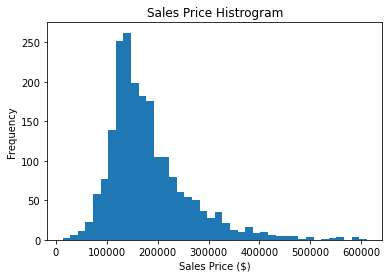

<AxesSubplot:xlabel='saleprice'>

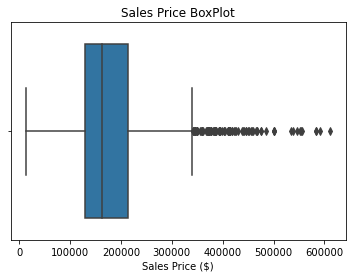

In [37]:
#Understanding saleprice 

#Check histogram of sales price.
plt.hist(df['saleprice'], bins=40)

# Add title and axis names
plt.title('Sales Price Histrogram')
plt.xlabel('Sales Price ($)')
plt.ylabel('Frequency')
 
# Display results
plt.show()

#Check boxplot of sales price
display(sns.boxplot(df['saleprice']))

# Add title and axis names
plt.title('Sales Price BoxPlot')
plt.xlabel('Sales Price ($)')

#Save photo
plt.savefig('./3-Images/Boxplot for sale price.png')

# Display results
plt.show()

Based on the histogram and boxplot, it is observed that the median range is around $160000.

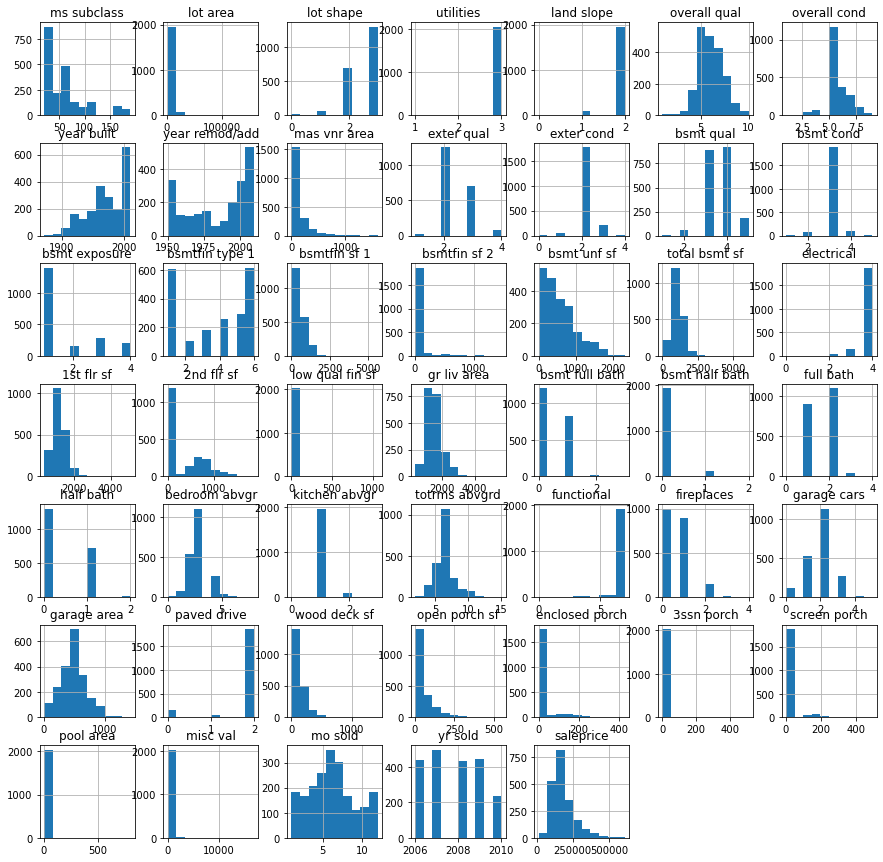

In [38]:
#Histogram for all columns
df.hist(figsize=(15, 15));

#Save photo
plt.savefig('./3-Images/Histrogram for all variables.png')

#Show
plt.show()

The following above shows the distribution for all columns.

overall qual     0.800207
exter qual       0.712146
bsmt qual        0.648773
total bsmt sf    0.628754
1st flr sf       0.618486
gr liv area      0.697038
garage cars      0.648128
garage area      0.650241
saleprice        1.000000
dtype: float64

(9,)

pandas.core.series.Series

Index(['overall qual', 'exter qual', 'bsmt qual', 'total bsmt sf',
       '1st flr sf', 'gr liv area', 'garage cars', 'garage area', 'saleprice'],
      dtype='object')

pandas.core.indexes.base.Index

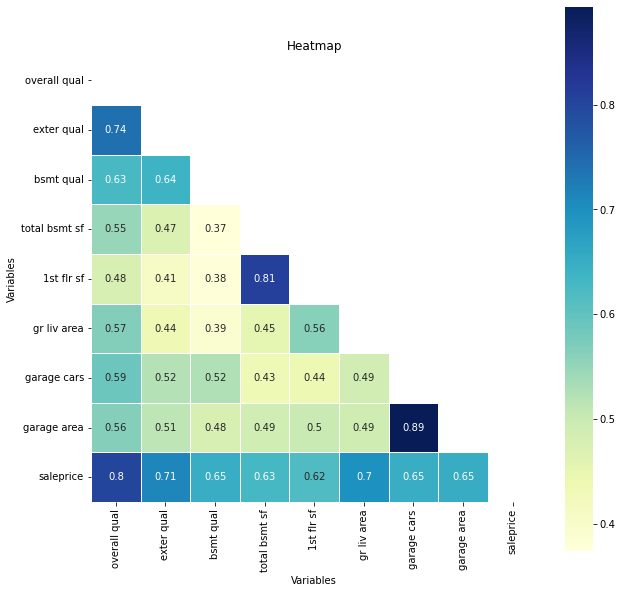

In [39]:
#Use only >0.6 matrix correlation with ONLY sales price. 

threshold=0.6

#Create a variable that consist of only related to saleprice
df_mx_saleprice=df.corrwith(df["saleprice"])

#Create a variable that consist of only related to saleprice
df_mx_saleprice=df_mx_saleprice[df_mx_saleprice>threshold]

#Check results
display(df_mx_saleprice)
display(df_mx_saleprice.shape)
display(type(df_mx_saleprice))

#Create a variable to store index of the >0.6 maxtrix correlation with salesprice
salesp_index=df_mx_saleprice.index
display(salesp_index)
display(type(salesp_index))

#Settings for figure size
plt.figure(figsize=(10,10))

#Creating mask
mask = np.triu(np.ones_like(df[salesp_index].corr()))
 
#Plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[salesp_index].corr(), cmap="YlGnBu",linewidth=1, linecolor='w', square=True, annot=True,mask=mask)

# Add title and axis names
plt.title('Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Displaying triangle heatmap
plt.show()

From the heatmap above, we can see that garage car and garage area has a high correlation. After looking at the description file, I have confirmed that it is the same thing. Therefore, I have decided to remove garage car from our analysis.

overall qual     0.800207
exter qual       0.712146
bsmt qual        0.648773
total bsmt sf    0.628754
1st flr sf       0.618486
gr liv area      0.697038
garage area      0.650241
saleprice        1.000000
dtype: float64

(8,)

pandas.core.series.Series

Index(['overall qual', 'exter qual', 'bsmt qual', 'total bsmt sf',
       '1st flr sf', 'gr liv area', 'garage area', 'saleprice'],
      dtype='object')

pandas.core.indexes.base.Index

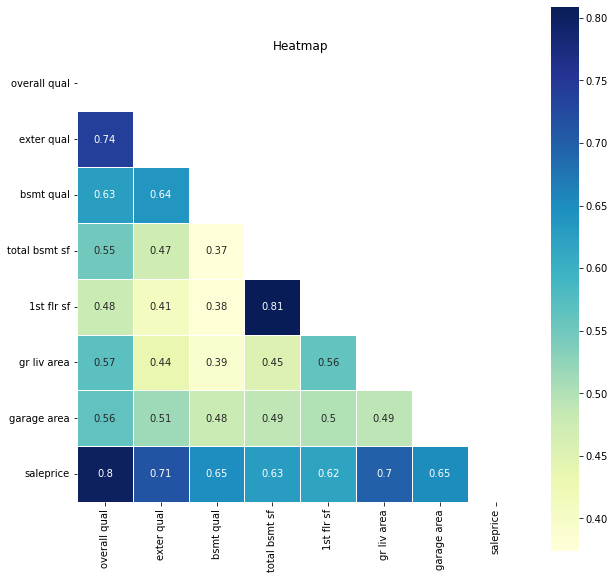

In [40]:
#Drop garage cars as garage area is correlated to garage car

#Drop the garage car
del df_mx_saleprice['garage cars']

#Check results
display(df_mx_saleprice)
display(df_mx_saleprice.shape)
display(type(df_mx_saleprice))

#Create a variable to store index of the >0.6 maxtrix correlation with salesprice
salesp_index=df_mx_saleprice.index
display(salesp_index)
display(type(salesp_index))

#Settings for figure size
plt.figure(figsize=(10,10))

#Creating mask
mask = np.triu(np.ones_like(df[salesp_index].corr()))

# Add title and axis names
plt.title('Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

#Plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[salesp_index].corr(), cmap="YlGnBu",linewidth=1, linecolor='w', square=True, annot=True,mask=mask)

#Save photo
plt.savefig('./3-Images/heatmap.png')

# Displaying triangle heatmap
plt.show()

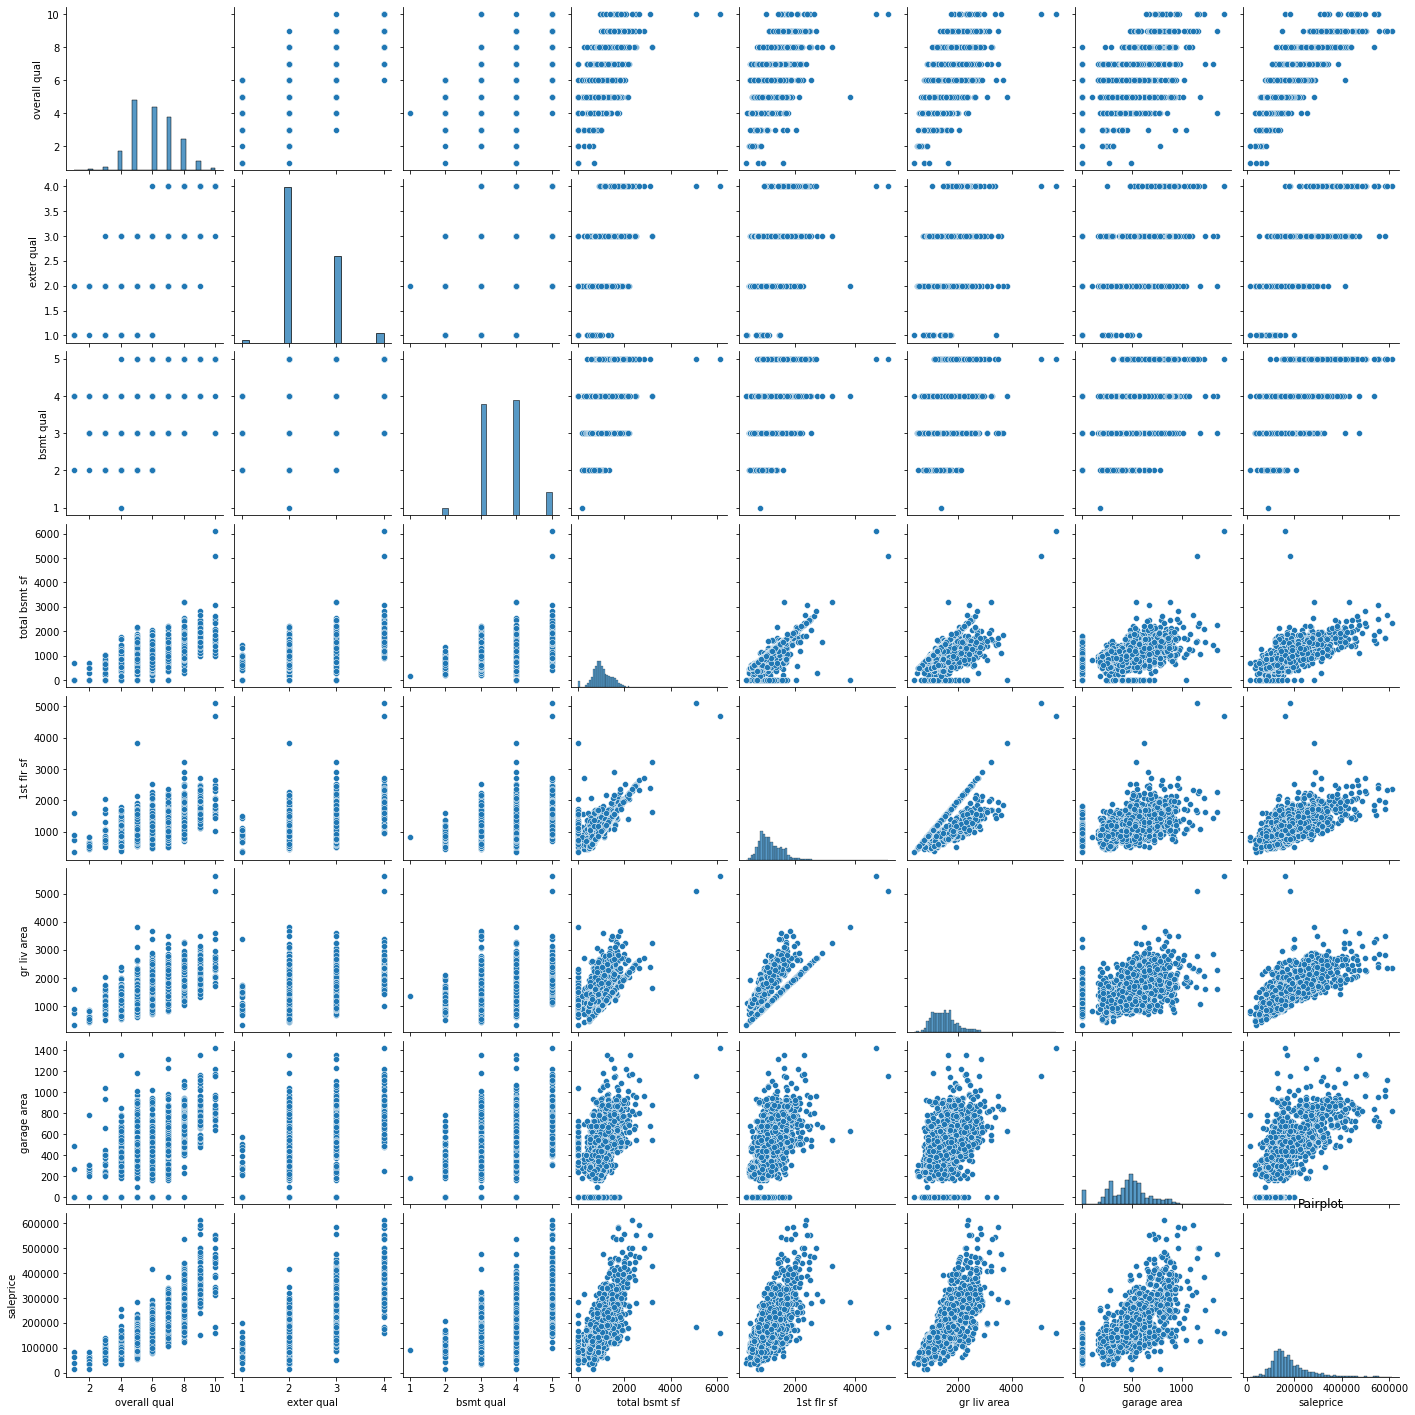

In [41]:
#Pairplot
sns.pairplot(df[salesp_index])

# Add title and axis names
plt.title('Pairplot')

# Displaying triangle heatmap
plt.show()

The pairplot above is used to find out if there is any interesting relationship between any variable.

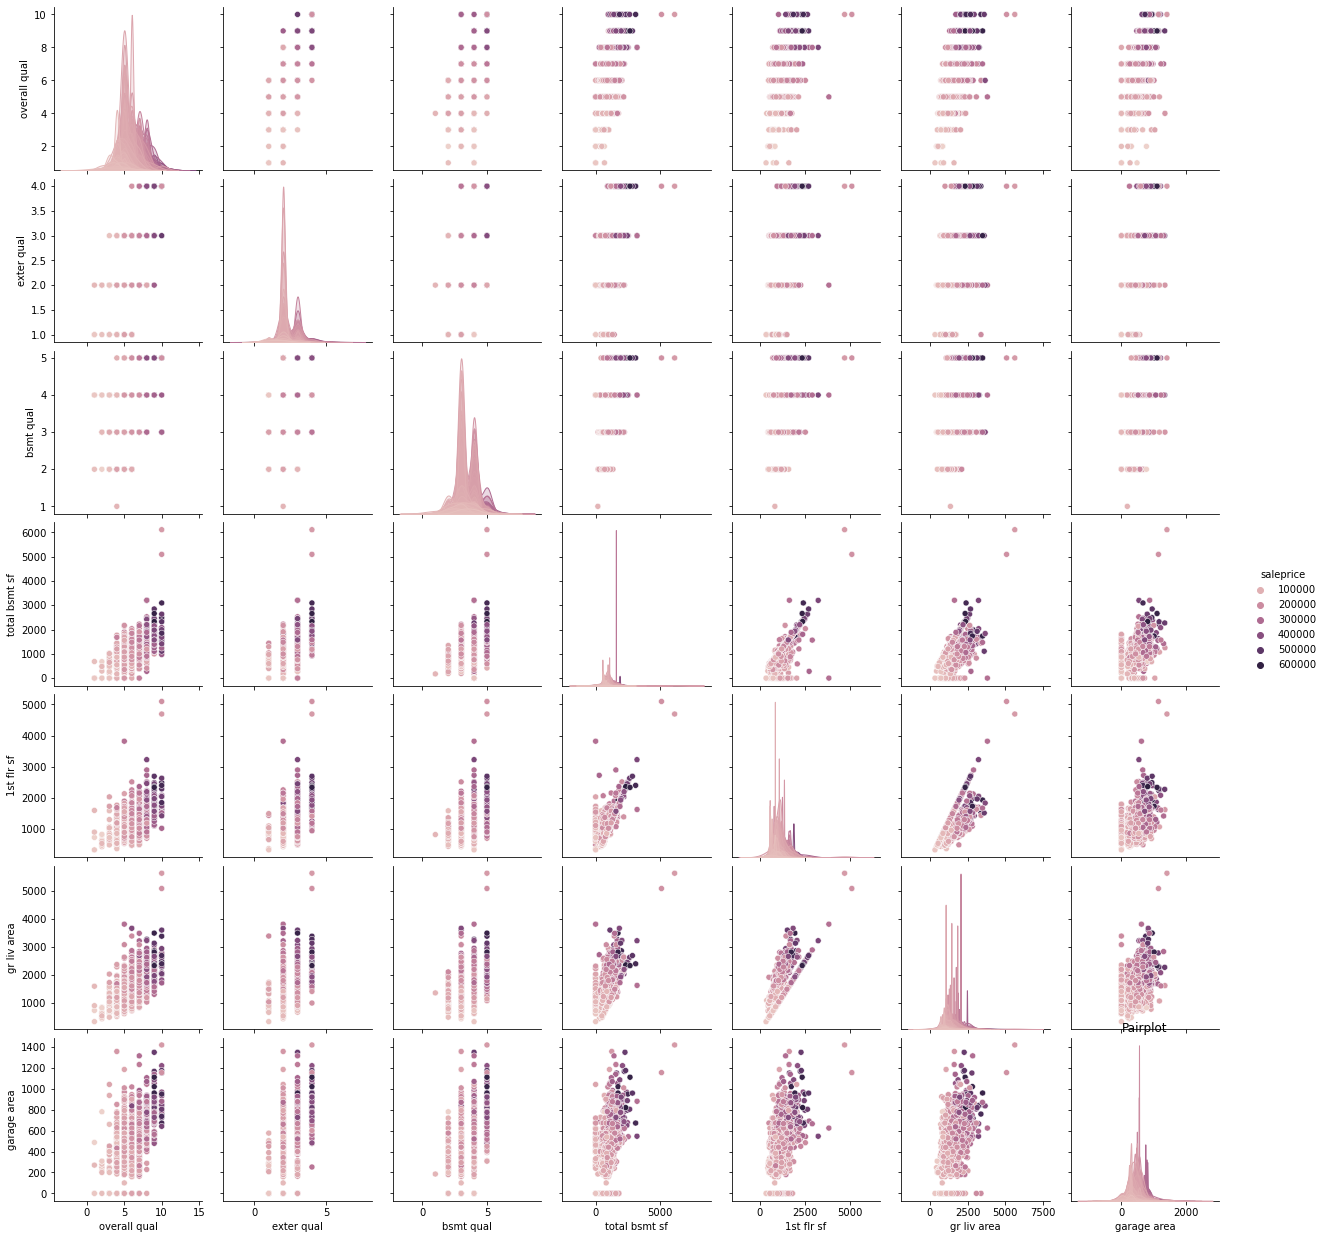

In [42]:
#pairplot with reference with sales price
sns.pairplot(df[salesp_index],hue="saleprice")

# Add title and axis names
plt.title('Pairplot')

#Save photo
plt.savefig('./3-Images/pairplot ref saleprice.png')

# Displaying triangle heatmap
plt.show()

The above pairplot is done with reference with sales price and it is used to find any relationship between variable and the sales price values.

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**saleprice**|int64|Train|The sale price of the house.| 
|**garage area**|int64|Train & Test|The size of garage in square feet.| 
|**gr liv area**|int64|Train & Test|Above grade (ground) living area square feet.| 
|**1st flr sf**|int64|Train & Test|First Floor square feet.| 
|**total bsmt sf**|int64|Train & Test|Total square feet of basement area.| 
|**bsmt qual**|int64|Train & Test|Evaluates the height of the basement.| 
|**exter qual**|int64|Train & Test|Evaluates the quality of the material on the exterior.| 
|**overall qual**|int64|Train & Test|Rates the overall material and finish of the house.| 

# Preprocessing & Modeling

## Train-Test Split

In [43]:
#Assemble our X and y variables

#Create a variable, X, to store the features(x variables) that we are going to find. First create a features to store the index.
features = list(salesp_index.drop("saleprice"))

#Check the results
display(features)

#Create a variable, X, to store the features
X = df[features]

#Create a variable,y, to store the column we are trying to predict 
vy = df['saleprice']

#Check the results of variable x and y
display(X)
display(vy)

['overall qual',
 'exter qual',
 'bsmt qual',
 'total bsmt sf',
 '1st flr sf',
 'gr liv area',
 'garage area']

,overall qual,exter qual,bsmt qual,total bsmt sf,1st flr sf,gr liv area,garage area
0,6,3,3.0,725.0,725,1479,475.0
1,7,3,4.0,913.0,913,2122,559.0
2,5,2,3.0,1057.0,1057,1057,246.0
3,5,2,4.0,384.0,744,1444,400.0
4,6,2,2.0,676.0,831,1445,484.0
...,...,...,...,...,...,...,...
2046,8,3,4.0,1884.0,1728,1728,520.0
2047,4,2,3.0,861.0,861,861,539.0
2048,6,2,3.0,896.0,1172,1913,342.0
2049,4,2,3.0,1200.0,1200,1200,294.0


0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: saleprice, Length: 2051, dtype: int64

In [44]:
#Ensure that random_state is the same if we are doing group project. Otherwise, the values will be different
X_train, X_test, y_vtrain, y_vtest = train_test_split(X, vy,train_size=0.75,test_size=0.25, random_state=40)

#Check shape of training and test sets
display(X_train.shape); display(X_test.shape); display(y_vtrain.shape); display(y_vtest.shape)

(1538, 7)

(513, 7)

(1538,)

(513,)

In [45]:
#Scaling : follow on the model workflow chapter
ss = StandardScaler()
ss.fit(X_train)

#transform
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

##  Instantiate & Fit Training Models

In [46]:
#Multiple Linear Regression
lr = LinearRegression()
display(lr)

LinearRegression()

In [47]:
#Ridge Regression (L2)
ridgeRegressor = Ridge()
display(ridgeRegressor)

Ridge()

In [48]:
#Lasso Regression (L1)
lassoRegressor = Lasso()
display(lassoRegressor)

Lasso()

## Cross validation

In [49]:
#Generate the cross_val score for LR fitted for trained dataset (Interms of R^2)
lr_scores = cross_val_score(lr, X_train_sc, y_vtrain, cv=5)
print("Multiple linear regression cross val score :",lr_scores.mean().round(5))

Multiple linear regression cross val score : 0.81267


In [50]:
#Regression model for trained dataset (Interms of R^2)
ridge_scores = cross_val_score(ridgeRegressor, X_train_sc, y_vtrain, cv=5)
print("Regression cross val score :",ridge_scores.mean().round(5))

Regression cross val score : 0.81269


In [51]:
# Lasso for trained dataset (Interms of R^2)
lasso_scores = cross_val_score(lassoRegressor, X_train_sc, y_vtrain, cv=5)
print("Lasso cross val score :",lasso_scores.mean().round(5))

Lasso cross val score : 0.81267


Since regression model has the best cross val score, we will use regression model for model fitting.

In [52]:
#For kraggle and this is to see the difference in values
value_regress=-cross_val_score(ridgeRegressor, X_train_sc, y_vtrain,cv=5, scoring = "neg_root_mean_squared_error").mean()
print("The value based on Regression model is :",value_regress.round(2) )

The value based on Regression model is : 33651.41


## Model Fitting and Evaluation


In [53]:
#Model fitting for training dataset
display(ridgeRegressor.fit(X_train_sc, y_vtrain))

#Model Train Score for training dataset(R^2)
print("Model Train Score is : ",ridgeRegressor.score(X_train_sc, y_vtrain).round(5))

#Model Val Test Score for training dataset (R^2)
print("Model Val Test Score is : ",ridgeRegressor.score(X_test_sc, y_vtest).round(5))

#Mean scores of R^2
print("Model x-val score Mean Score is : ",ridge_scores.mean().round(5))

#predict y_val using x test training dataset score (SI unit in Y_val=ridge_pred) aslo MSE
ridge_pred = ridgeRegressor.predict(X_test_sc)
print('Y-Predict training dataset Score is :',mean_squared_error(y_vtest, ridge_pred, squared = False).round(2))

# Calculate model performance(R^2)
R_squared = r2_score(ridge_pred, y_vtest)
print('Test R-squared score for ridge :', R_squared.round(5))

Ridge()

Model Train Score is :  0.81842
Model Val Test Score is :  0.76858
Model x-val score Mean Score is :  0.81269
Y-Predict training dataset Score is : 38766.67
Test R-squared score for ridge : 0.7198


Based on the results above, it is observed that :
<br>
- the train score is slightly better than the val test score, 
<br>
- the model has around 81% accuracy,
<br>
- the differences between the train and test score is less than 10% difference. 

Therefore, the model is neither underfitted or overfitted. It is just the right fit.

In [54]:
#Check the Ridge Regression performanance

#vectorization
display(np.sqrt(((X - y_vtest)**2).sum()))

#Interpreting Slopes
display(pd.Series(ridgeRegressor.coef_, index=features))

0                0.0
1                0.0
7                0.0
8                0.0
12               0.0
                ... 
exter qual       0.0
garage area      0.0
gr liv area      0.0
overall qual     0.0
total bsmt sf    0.0
Length: 520, dtype: float64

overall qual     21831.285836
exter qual       13096.665762
bsmt qual        10854.599289
total bsmt sf     9570.569671
1st flr sf        5122.490648
gr liv area      21325.752947
garage area       9550.566056
dtype: float64

,Column_Name,Coefficient_Value
0,overall qual,21831.285836
1,exter qual,13096.665762
2,bsmt qual,10854.599289
3,total bsmt sf,9570.569671
4,1st flr sf,5122.490648
5,gr liv area,21325.752947
6,garage area,9550.566056


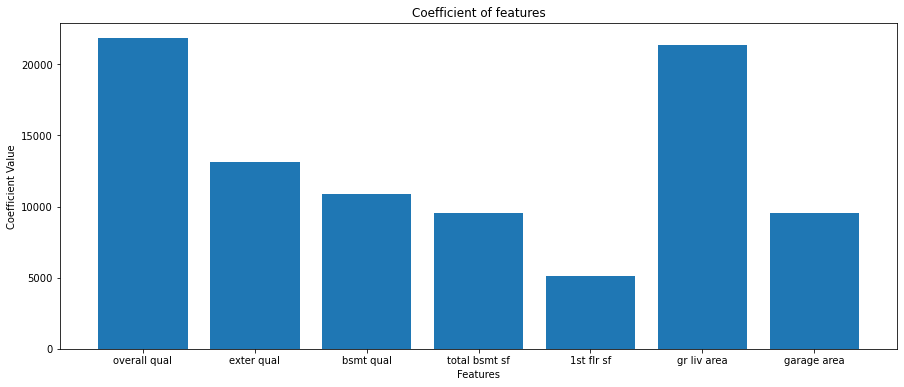

In [55]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
display(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

# Add title and axis names
plt.title('Coefficient of features')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

#Save photo
plt.savefig('./3-Images/Coefficient of features.png')

# Displaying triangle heatmap
plt.show()

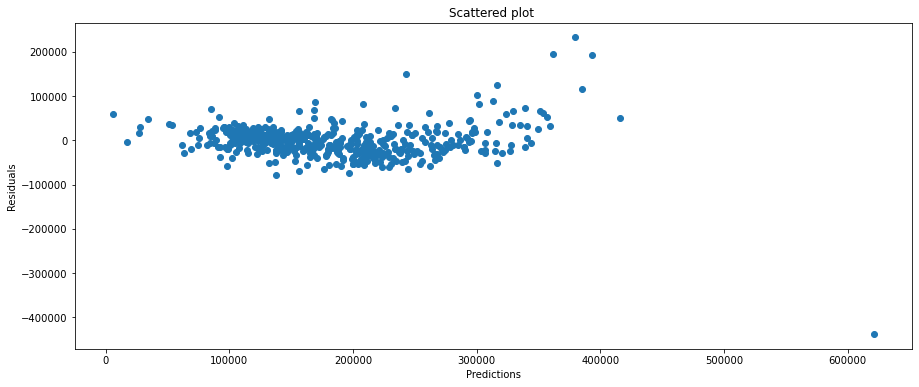

In [56]:
# Plot predictions (x-axis) against residuals (y-axis)
residuals = y_vtest - ridge_pred
plt.scatter(ridge_pred, residuals)

# Add title and axis names
plt.title('Scattered plot ')
plt.xlabel('Predictions')
plt.ylabel('Residuals')

#Save photo
plt.savefig('./3-Images/Scattered Plot.png')

# Displaying triangle heatmap
plt.show()

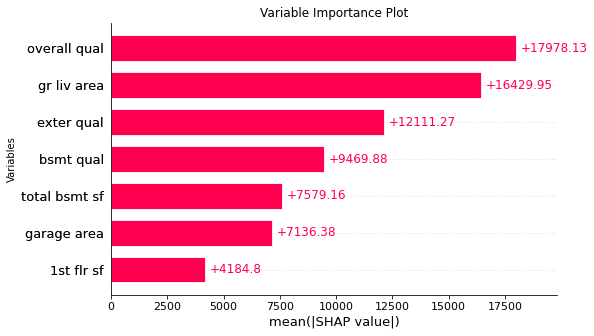

In [57]:
#Variable Importance Plot

#Shapley Values - for explaining the predictions of your ML model

explainer = shap.explainers.Linear(ridgeRegressor, X_train_sc)
shap_values = explainer(X_train_sc)

# Add back the feature names removed by the StandardScaler
for i,c in enumerate(X.columns):
    shap_values.feature_names[i] = c

# Add title and axis names
plt.title('Variable Importance Plot')
plt.ylabel('Variables')

# Visualise variable importance for top 7 features
shap.plots.bar(shap_values, max_display=11,show=False)

#Save photo
plt.savefig('./3-Images/Variable Importance Plot.png')

# Displaying triangle heatmap
plt.show()

Based on the bar chart above, it is clear that the overall qual is the biggest contribution to the sales price.

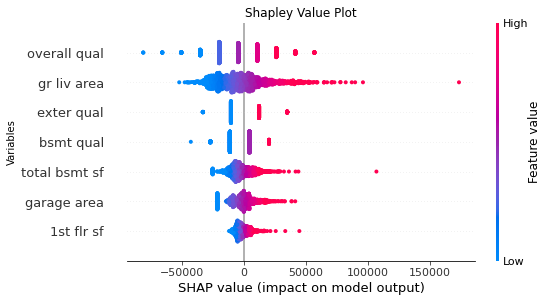

In [58]:
#+ive and -ive relationship for the predictors using Shapley value plot
explainer = shap.explainers.Linear(ridgeRegressor, X_train_sc)
ridgeRegressor_shap_values = explainer(X_train_sc)

# we add back the feature names removed by the StandardScaler
for i,c in enumerate(X.columns):
    ridgeRegressor_shap_values.feature_names[i] = c

# Add title and axis names
plt.title('Shapley Value Plot')
plt.ylabel('Variables')

#Summary plot
shap.summary_plot(ridgeRegressor_shap_values, X_train_sc,show=False)

#Save photo
plt.savefig('./3-Images/Shapley Value Plot.png')

# Displaying triangle heatmap
plt.show()

Based on the shapley value plot, it is observed that the overall qual is the biggest positive and negative impact.

In [59]:
#Use the cleaned test dataset to predict the price of sales price
#Create a variable to store cleand dataset with revelent features
testsetX=df_test[features]

#Check results
display(testsetX)

#Scale,fit and transform 
ss.fit(testsetX)
testsetX_sc = ss.transform(testsetX)

#predict y from test dataset
testy_ridge_preds = ridgeRegressor.predict(testsetX_sc)

#Check results
display(testy_ridge_preds)
display(type(testy_ridge_preds))

,overall qual,exter qual,bsmt qual,total bsmt sf,1st flr sf,gr liv area,garage area
0,6,2,2.0,1020,908,1928,440
1,5,2,4.0,1967,1967,1967,580
2,7,3,4.0,654,664,1496,426
3,5,3,3.0,968,968,968,480
4,6,2,4.0,1394,1394,1394,514
...,...,...,...,...,...,...,...
873,6,2,3.0,1084,1084,1877,488
874,6,3,3.0,1104,1104,1988,480
875,5,2,3.0,952,1211,1211,322
876,4,2,3.0,864,864,864,528


array([160937.23380003, 220558.9744615 , 200914.63816427, 144986.04237648,
       188310.92710966,  86588.6344147 , 102571.16328438, 150638.93186283,
       222655.59538536, 159843.92720327, 196403.16532424, 136024.440802  ,
       168172.03113299, 284002.12292095, 160826.58824236, 125286.98463704,
       169783.69844928, 123572.98347798, 187642.9236734 , 221030.74425583,
       119402.23068834, 124680.99214947, 229883.28263102, 140643.3440409 ,
       216569.97165302, 107611.40128508, 131441.54730309, 122076.86876582,
       141583.88811855,  34510.26888709, 106095.91304268, 112385.09618878,
       275695.91787285, 151887.11346025, 239639.80515074, 175327.09771138,
       126951.00784678,  76181.27869038, 118797.21933921, 229384.0306795 ,
       176398.69351451, 227950.96659886, 150269.01552377, 159324.47045632,
       236038.04055505,  87800.31713548, 230965.42143463, 110076.42566869,
       111319.34711378, 119530.18289397, 116932.30804211, 226641.48802497,
       276805.4295097 , 1

numpy.ndarray

In [60]:
#merge 2 dataset id to the predicted y values

#Check test dataset
display(df_test["id"])

#Create a new variable to put in to the dataset
df_testy_ridge_preds=pd.DataFrame(testy_ridge_preds)

#Check results
display(df_testy_ridge_preds)

#Combine 2 dataframe together using concat
df_kaggle=pd.concat([df_test["id"], df_testy_ridge_preds], axis=1)

#Check results
display(df_kaggle)

#Rename column names
df_kaggle.rename(columns={"id": "Id", 0:"SalePrice"},inplace=True)

#Check results
display(df_kaggle)

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
873    1662
874    1234
875    1373
876    1672
877    1939
Name: id, Length: 878, dtype: int64

,0
0,160937.233800
1,220558.974461
2,200914.638164
3,144986.042376
4,188310.927110
...,...
873,180454.481610
874,208922.073596
875,127660.750234
876,99562.098857


,id,0
0,2658,160937.233800
1,2718,220558.974461
2,2414,200914.638164
3,1989,144986.042376
4,625,188310.927110
...,...,...
873,1662,180454.481610
874,1234,208922.073596
875,1373,127660.750234
876,1672,99562.098857


,Id,SalePrice
0,2658,160937.233800
1,2718,220558.974461
2,2414,200914.638164
3,1989,144986.042376
4,625,188310.927110
...,...,...
873,1662,180454.481610
874,1234,208922.073596
875,1373,127660.750234
876,1672,99562.098857


In [61]:
#Save to csv file
df_kaggle.to_csv("./2-Kaggle_submittion_file/Kaggle_submittion.csv",index=False)

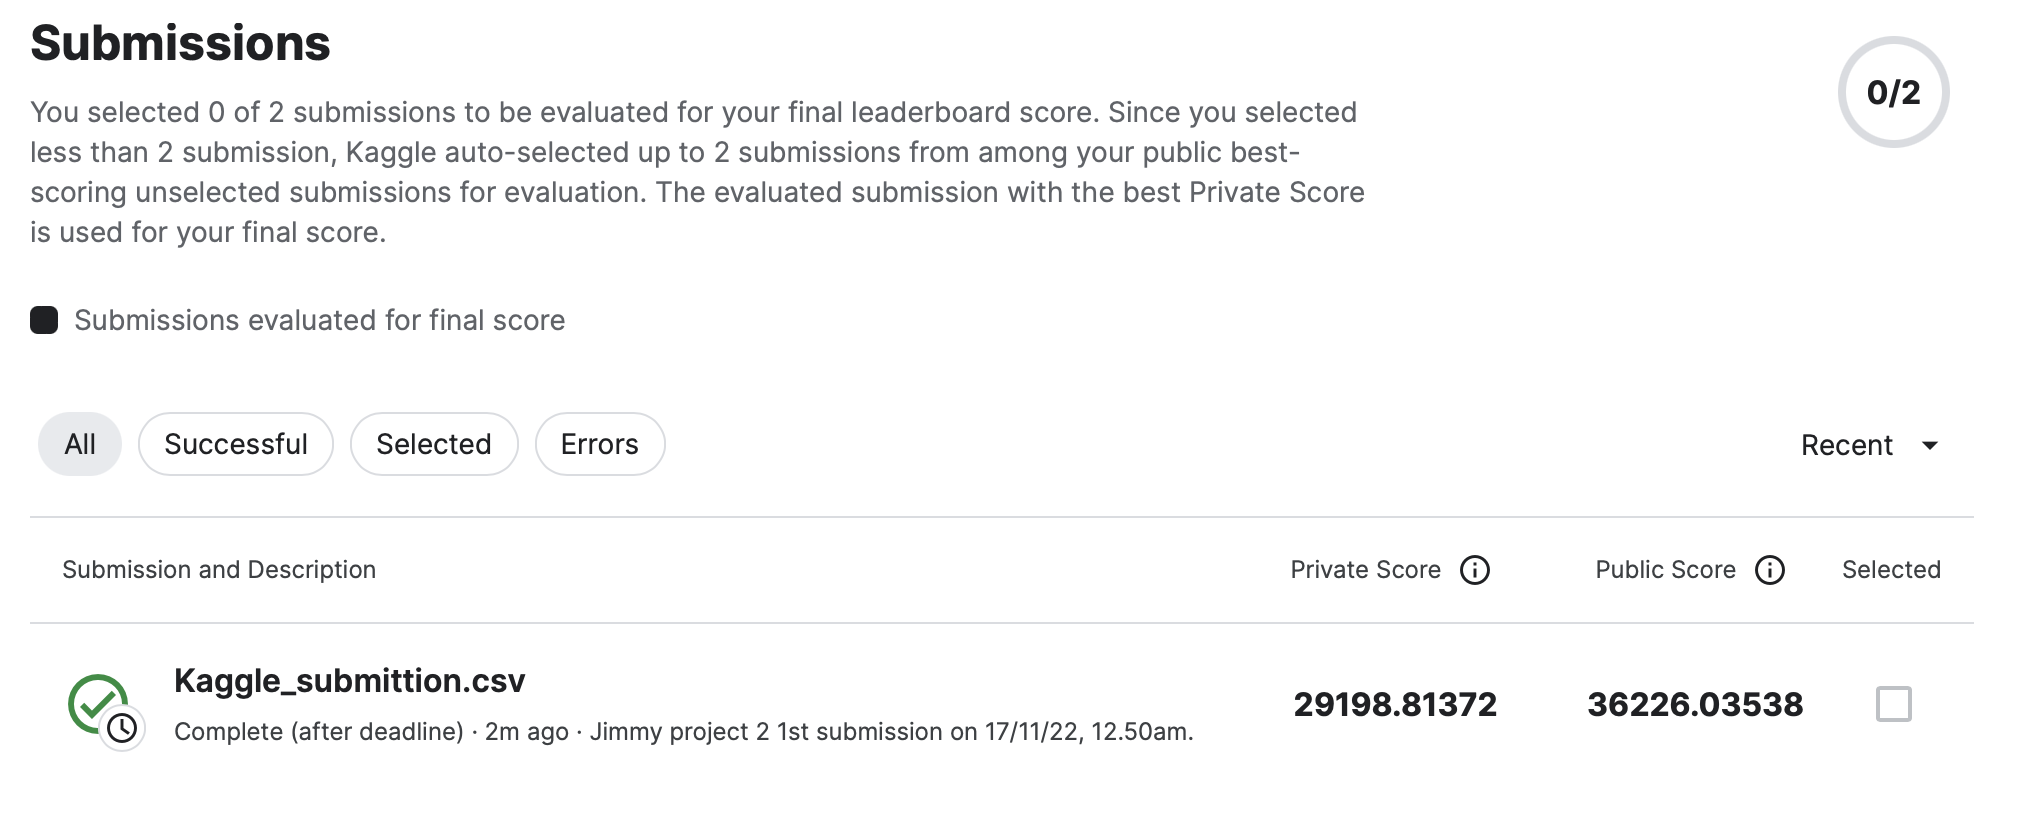

In [62]:
#Show screenshot of the submission
Image(filename='./3-Images/kaggle-submit-screenshot.png') 

## Limitations

The limitations of this project are the following:
<br>
    - External factors skewing sale prices (eg. recession, natural disasters)
    <br>
    - Lack of more recent year data
    <br>
    - Time constraint on trying out different models

# Conclusions & Recommendations

The key takeaway is that with my model,which has a 81% accuracy ,have identified 7 top core features that will greatly affect the sales price and we should place our focus on these features for the next development.

Therefore, I recommend that we can have a greater budget allocations and maketing on the core features.

In the future, I hope that I can implement features such as forcasting sales price using of machine learning.